In [14]:

import astropy 
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import ascii

#put all the component fits files into an array
#put all the component fits files into an array
component_array = ["1088284872", "1088284992", "1088285112", "1088285232", "1088285600",  "1088285720", "1088285848", "1088285968", "1088286088", "1088286208", "1088286336"]

# opens up the txt file 'more_data' and reads all the fits file names from that. 
more_data = open('/Users/georgiaalexakis/ToR - GitHub Repository/radio-eyes/wk3/more_data.txt', 'r')
more_data_shit = [line.split( ) for line in more_data.readlines()]

# adds the more_data array at the end of the component_array
for h in more_data_shit:
    component_array = np.append(component_array, more_data_shit)

for i in component_array:
    components = '/Users/georgiaalexakis/ToR - GitHub Repository/radio-eyes/wk3/more_data/' + i +'_components.fits'

    hdu_list = fits.open(components, memmap=True)


    info_array = hdu_list[1].data

    ra = info_array['RIGHTASCENSION']
    dec = info_array['DECLINATION']
    flux = info_array['FLUXI']
    #used eyed instead of id since id is already a taken name
    eyed = info_array['ID']
    
    # appropriate range for ra is [340,10] which goes over the 360 boundary, to mitigate this we add an offset such that the effective ra range is [-20, 10]!
    ra[ra>180] -= 360


    # here i am setting up the initial data in the array by putting the data from the first fits file in the array.
    if component_array[0] == i:
        ra_overall = ra
        dec_overall = dec
        eyed_overall = eyed
        flux_overall = flux
    #for all else, it appends to the new variable to make a REALLY BIG ARRAY OF EVERYTHING EVER
    else:
        ra_overall = np.append(ra_overall, ra)
        dec_overall = np.append(dec_overall, dec)
        eyed_overall = np.append(eyed_overall, eyed)
        flux_overall = np.append(flux_overall, flux)

#represents the total number of observations
n_obs = len(component_array)



def pixelate(ra_zoom, dec_zoom, n_bins, ra_overall, dec_overall, eyed_overall, flux_overall):

    #Check to see which dimension is larger so that a square in ra,dec can 
    #be returned
    if (ra_zoom[1]-ra_zoom[0]) > (dec_zoom[1]-dec_zoom[0]):
        zoom = ra_zoom
    else:
        zoom = dec_zoom

    #Find the size of the bins using the largest dimension and the num of bins
    binsize = (zoom[1]-zoom[0])/n_bins

    #Create arrays for ra and dec that give the left side of each pixel
    ra_bin_array = np.multiply(range(n_bins), binsize) + ra_zoom[0]
    dec_bin_array = np.multiply(range(n_bins), binsize) + dec_zoom[0]

    #Create an empty array of pixels to be filled in the for loops
    pixels = np.zeros((len(ra_bin_array),len(dec_bin_array)))

    #Histogram components into ra bins
    ra_histogram = np.digitize(ra_overall,ra_bin_array)

    #Begin for loop over both dimensions of pixels, starting with ra
    for bin_i in range(len(ra_bin_array) - 2):

        #Find the indices that fall into the current ra bin slice
        ra_inds = np.where(ra_histogram == bin_i)

        #Go to next for cycle if no indices fall into current ra bin slice
        if len(ra_inds) == 0:
            continue

        #Histogram components that fall into the current ra bin slice by dec
        dec_histogram = np.digitize(dec_overall[ra_inds],dec_bin_array)

        #Begin for loop by dec over ra bin slice
        for bin_j in range(len(dec_bin_array) -2):
            
            #Find the indicies that fall into the current dec bin
            dec_inds = np.where(dec_histogram == bin_j)

            #Go to next for cycle if no indices fall into current dec bin			
            if len(dec_inds) == 0:
                continue

            #Sum the flux components that fall into current ra/dec bin
            pixels[bin_i,bin_j] = np.sum(flux_overall[(ra_inds[0])[dec_inds[0]]])

    #Find the pixel centers in ra/dec for plotting purposes
    ra_pixel_centers = np.multiply(range(n_bins),binsize) + ra_zoom[0] + binsize/2.
    dec_pixel_centers = np.multiply(range(n_bins),binsize) + dec_zoom[0] + binsize/2.

    return pixels, ra_pixel_centers, dec_pixel_centers

# I am using this range because i don't want to get outlying flux values that could be noise and points of error. when i didnt do this the brightest flux was 88 which is 
# WAYY to big not to be an error or noise. 
# ra and dec range values tend to be in range: ra = [340, 10], dec = [-40,-10], but the ra range goes over the 360 boundary so we can do: ra[ra>180] -= 360 such that 
# the ra range is now [-20,10]
ra_zoom = [-20,10] #vals that get good image: [11.7, 12.1]
dec_zoom = [-40,-10] #vals that get good image: [-25.45, -25.15]
#bin number affects how pixelated the image is, the smaller the bin number the lower the resolution of the image is (cause pixels are huge)
n_bins = 160

range_of_ra_dec_1 = np.where((ra_overall >= ra_zoom[0]) & (ra_overall <= ra_zoom[1]) & (dec_overall >= dec_zoom[0]) & (dec_overall <= dec_zoom[1]))
#print(range_of_ra_dec)
new_ra_1 = ra_overall[range_of_ra_dec_1]
new_dec_1 = dec_overall[range_of_ra_dec_1]
new_flux_1 = flux_overall[range_of_ra_dec_1]
new_eyed_1 = eyed_overall[range_of_ra_dec_1]


max_flux_val = np.argmax((new_flux_1))
brightest_flux_index = np.argwhere((new_flux_1 >= 2.5) & ( new_flux_1 <= 3.5))
print("brightest_flux_index:", brightest_flux_index)



brightest_flux_index: [[     0]
 [     1]
 [     9]
 [ 19451]
 [ 19452]
 [ 19464]
 [ 38799]
 [ 38801]
 [ 38815]
 [ 58111]
 [ 58112]
 [ 58113]
 [ 58138]
 [ 77381]
 [ 77385]
 [ 77386]
 [ 77388]
 [ 77465]
 [ 96405]
 [ 96412]
 [ 96413]
 [ 96419]
 [ 96568]
 [115444]
 [115457]
 [115462]
 [115465]
 [115734]
 [134432]
 [134454]
 [134467]
 [134469]
 [134927]
 [153375]
 [153384]
 [153416]
 [153441]
 [153442]
 [172207]
 [172208]
 [172209]
 [172223]
 [172266]
 [172311]
 [172314]
 [191001]
 [191002]
 [191004]
 [191028]
 [191082]
 [191172]
 [191178]]


/var/folders/lh/gjdx4kyj4m9f7bzk50cysp6r0000gn/T/ipykernel_87450/2548590751.py:32: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.transpose(np.log(pixels2)), interpolation = "nearest", origin = "lower", cmap = "plasma",


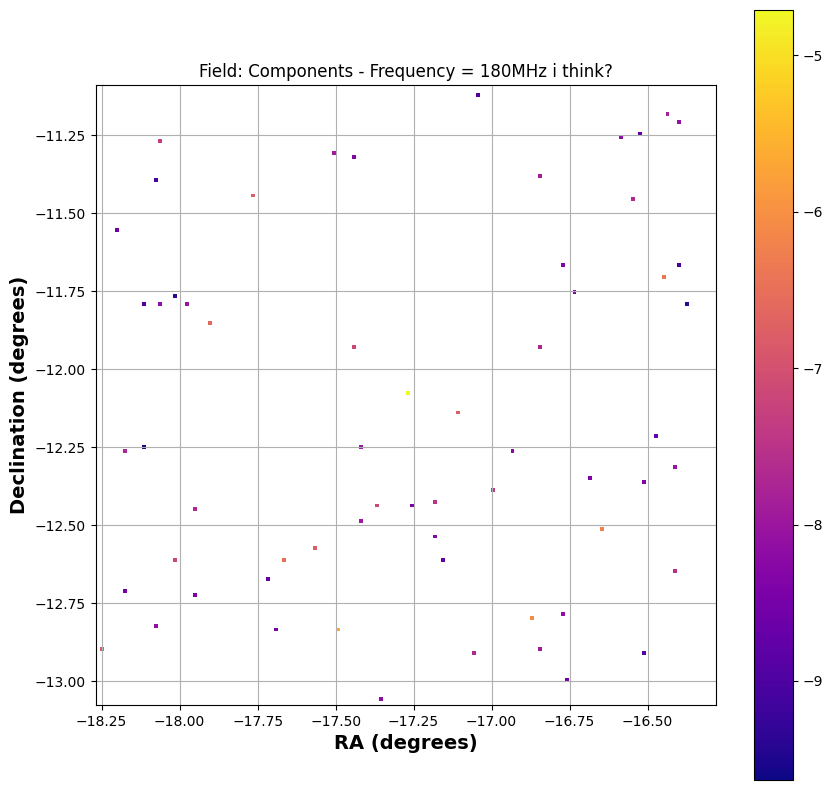

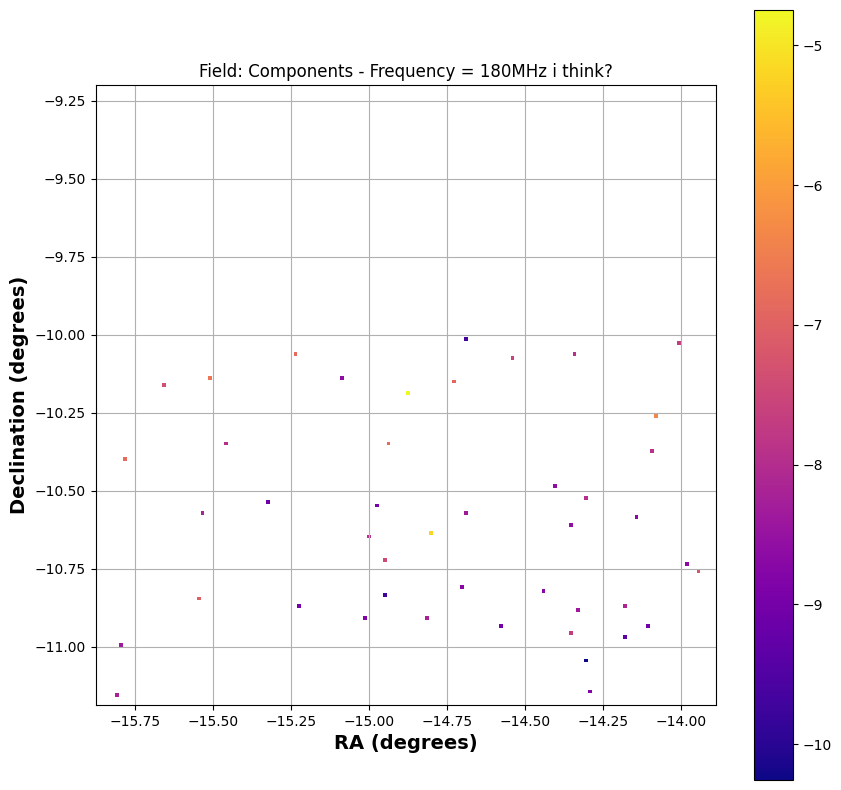

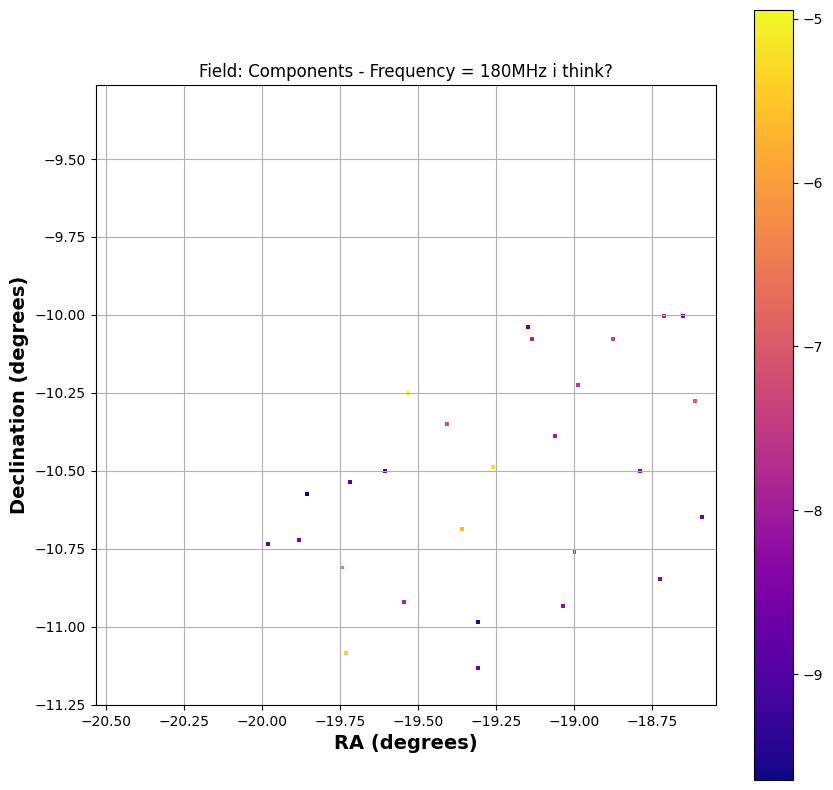

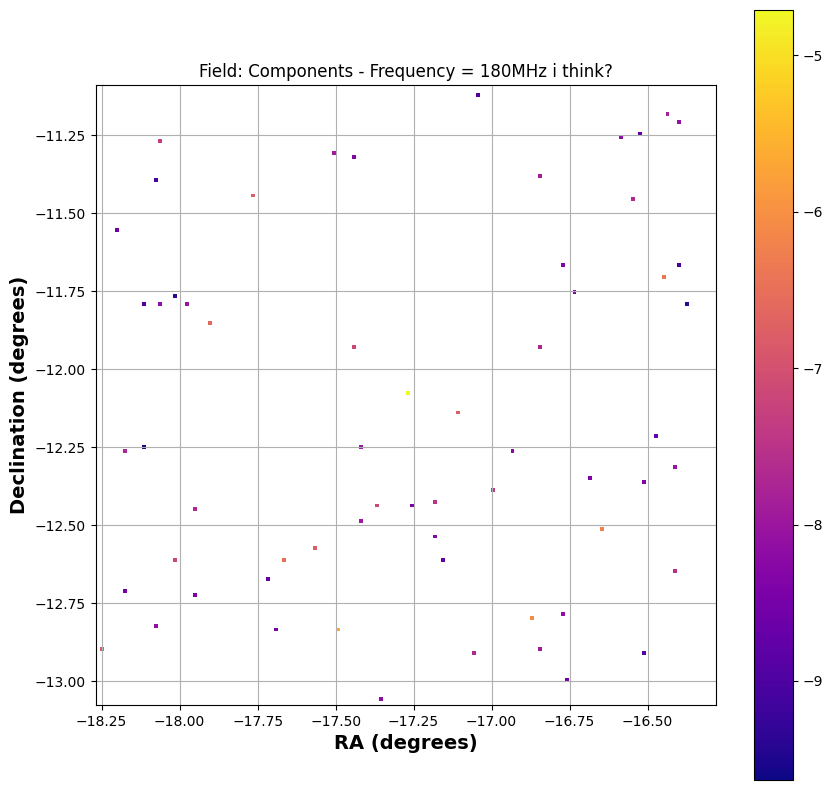

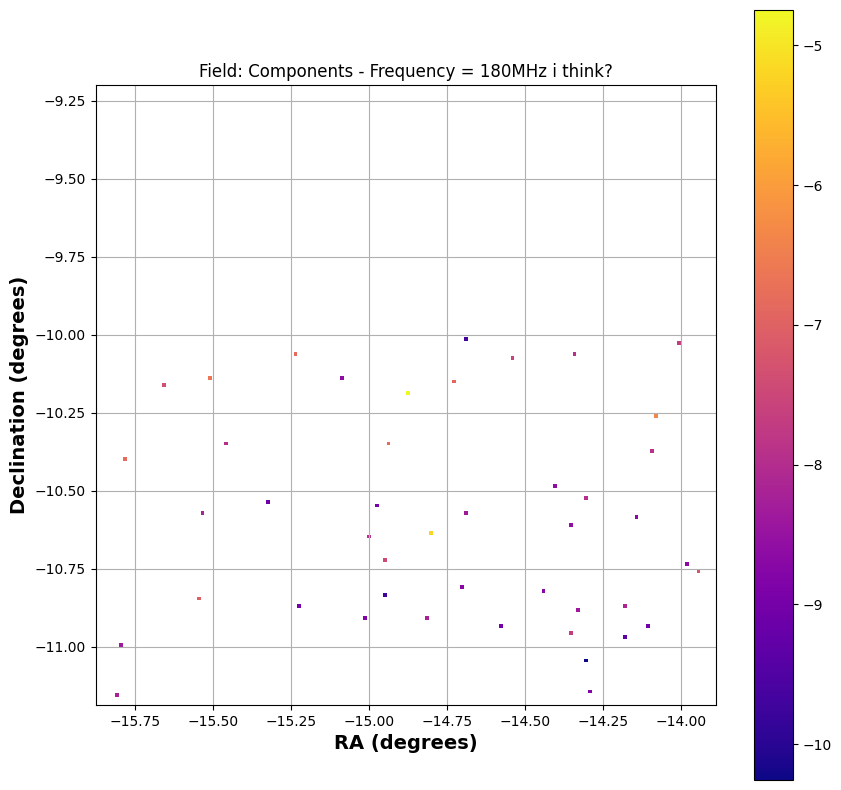

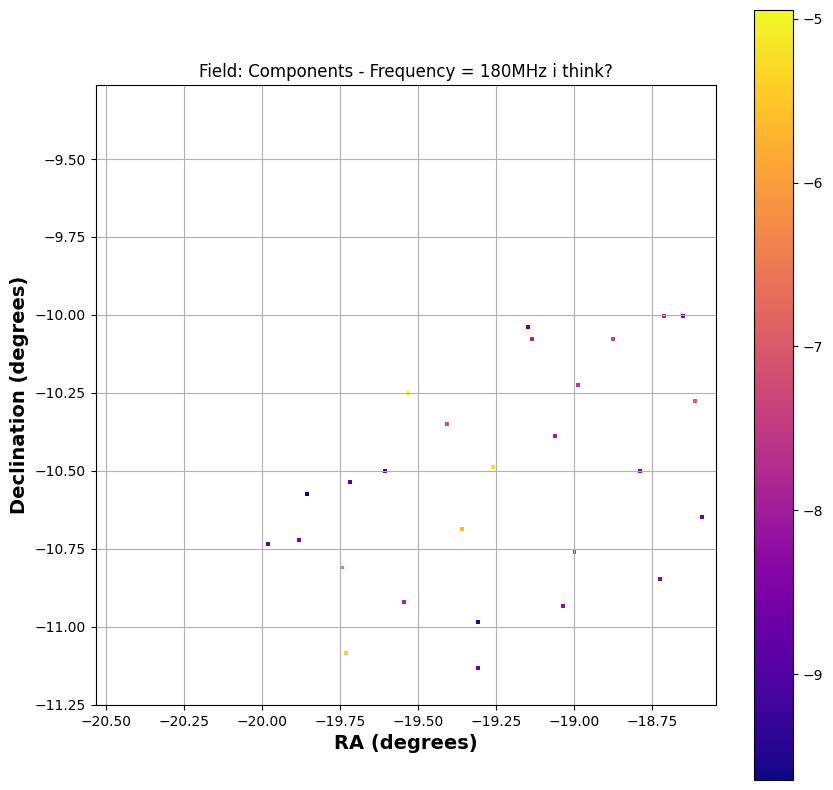

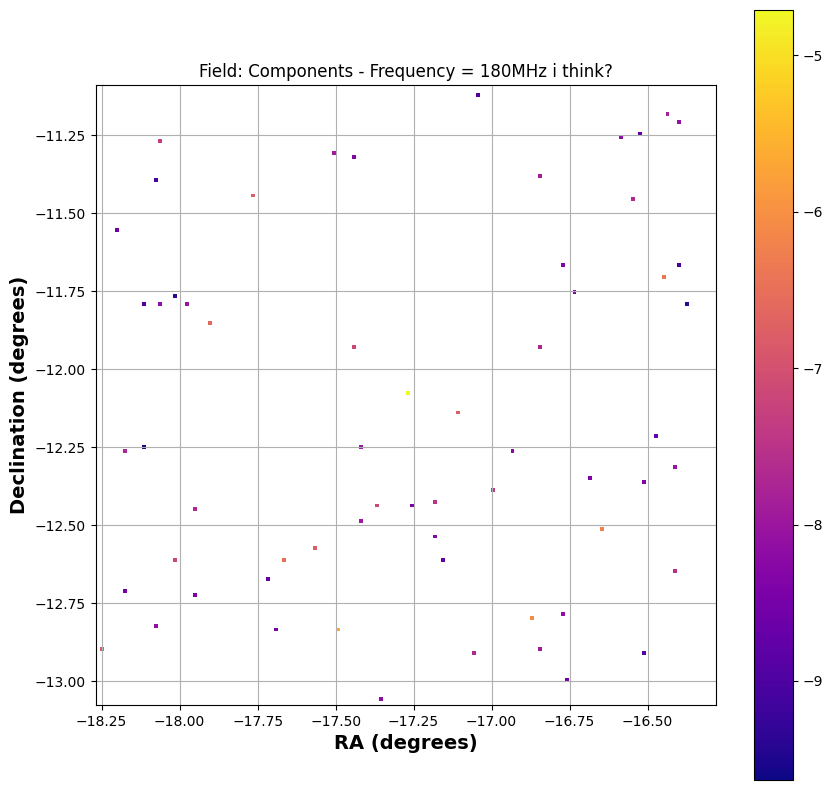

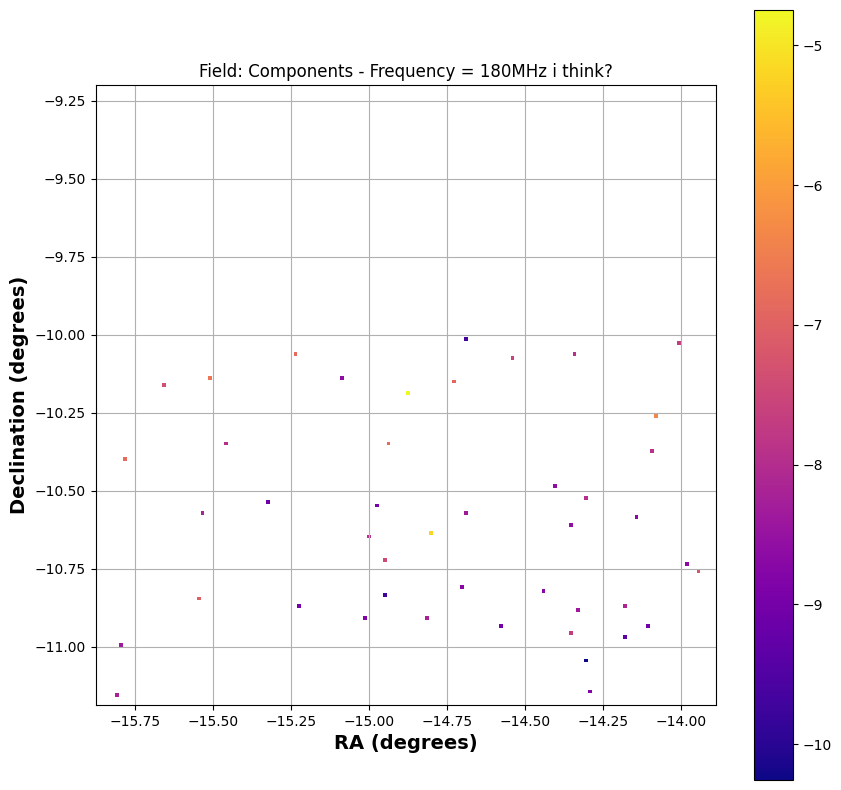

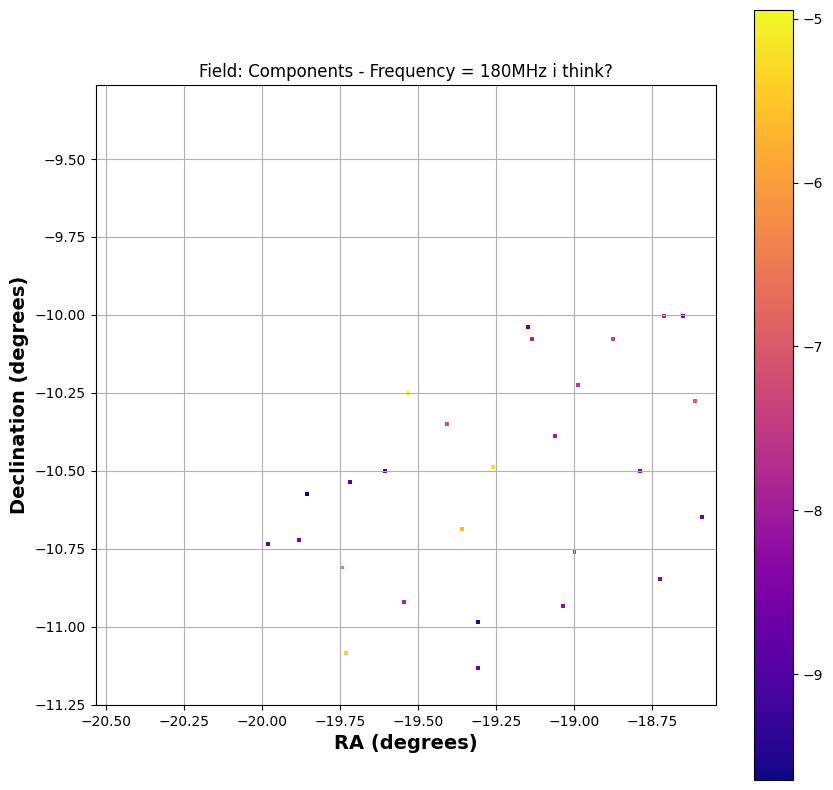

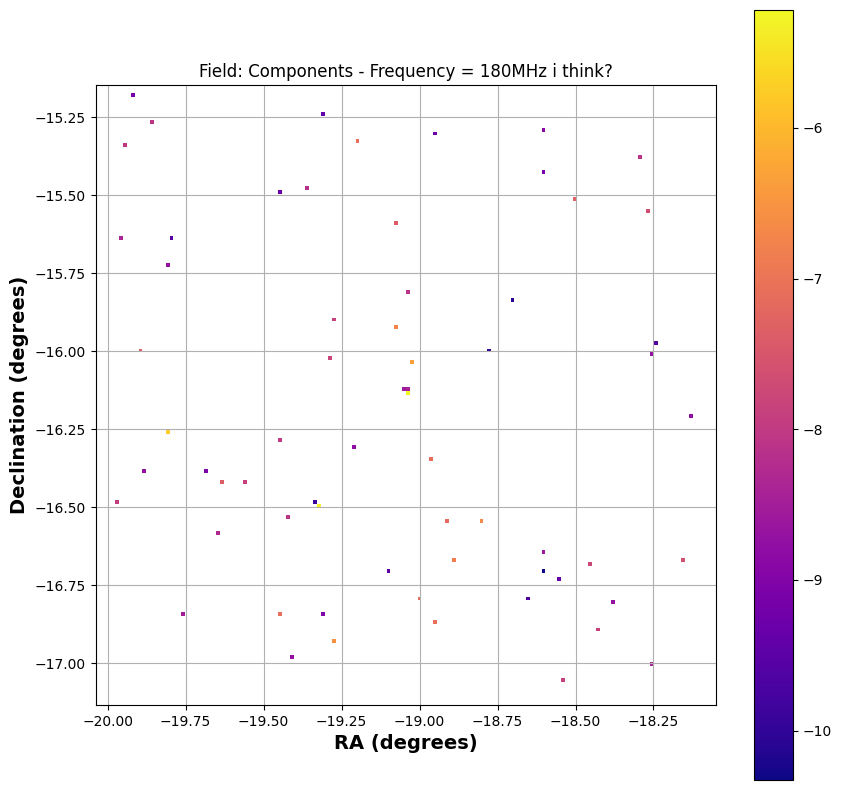

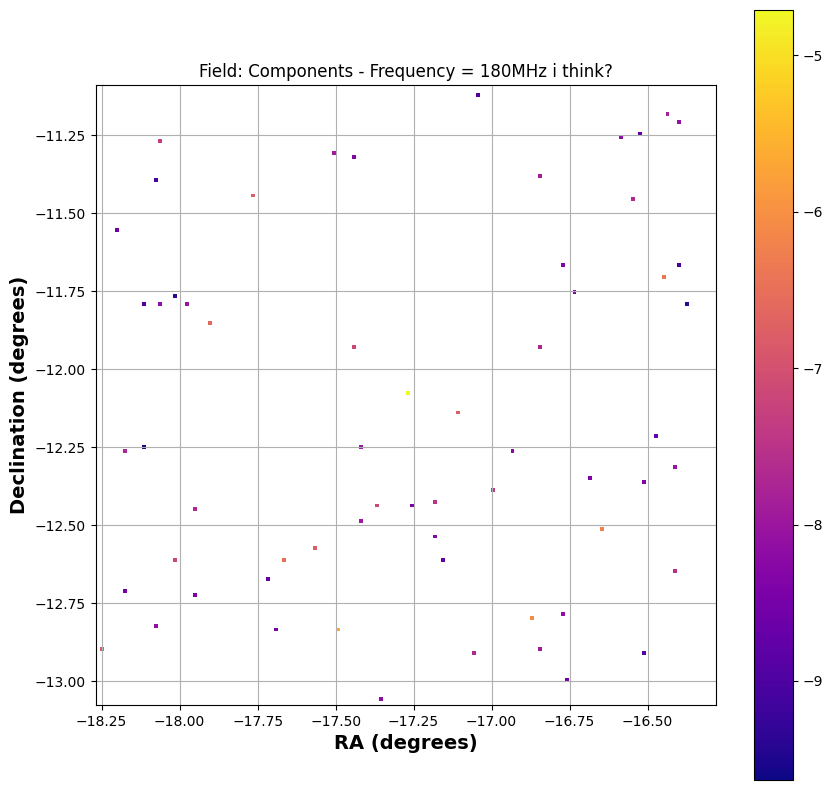

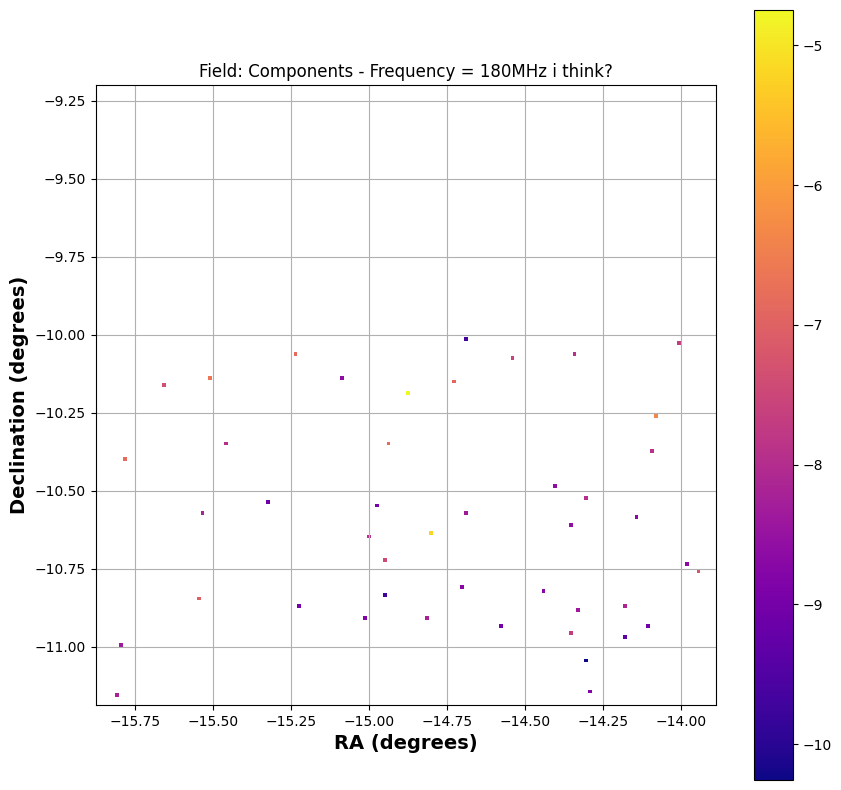

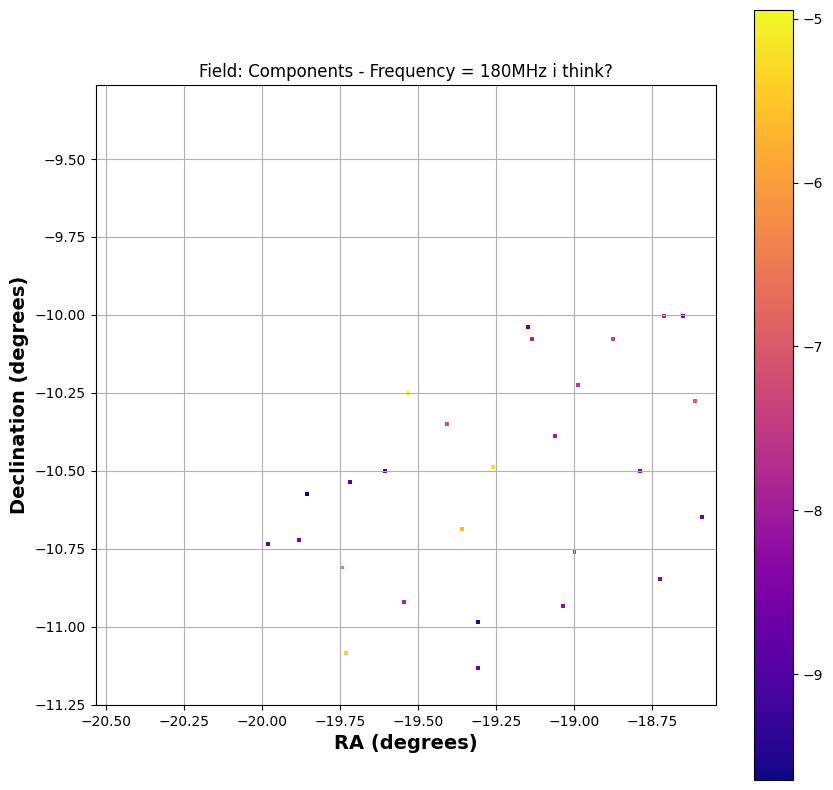

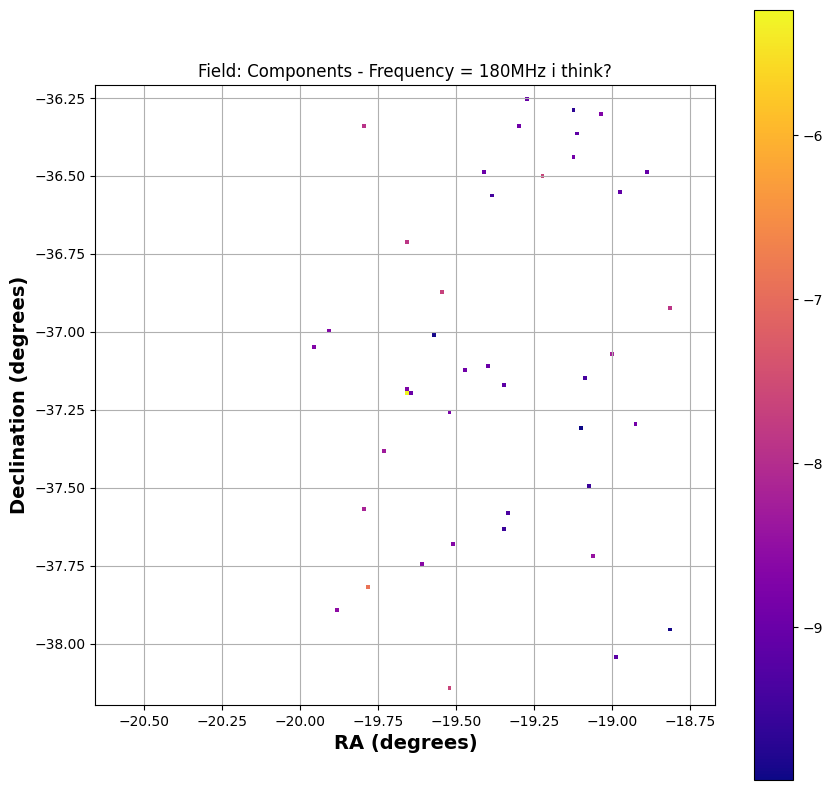

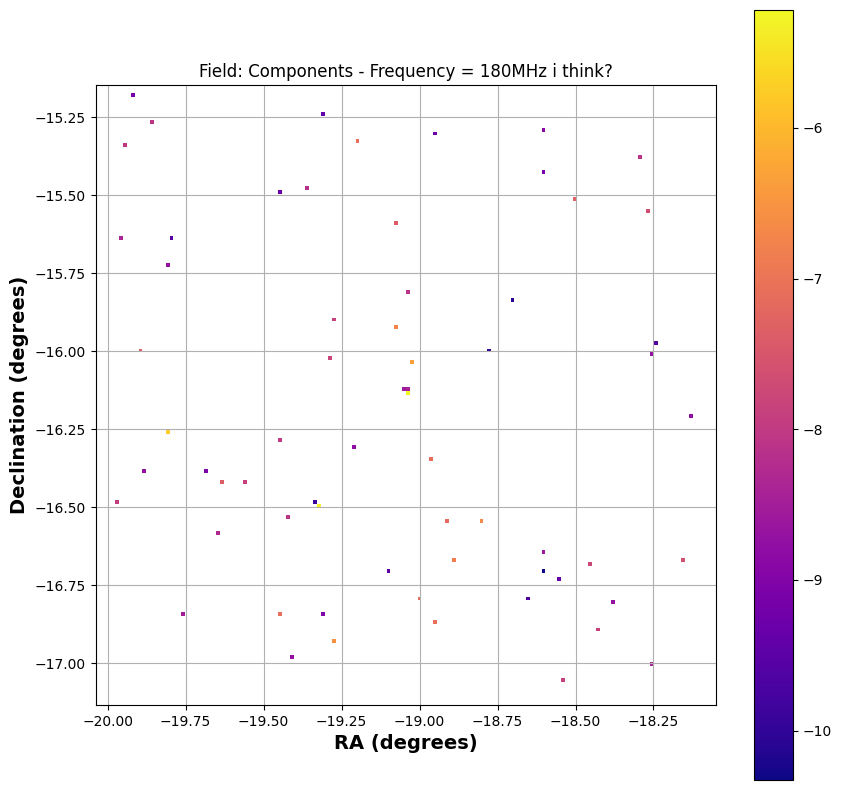

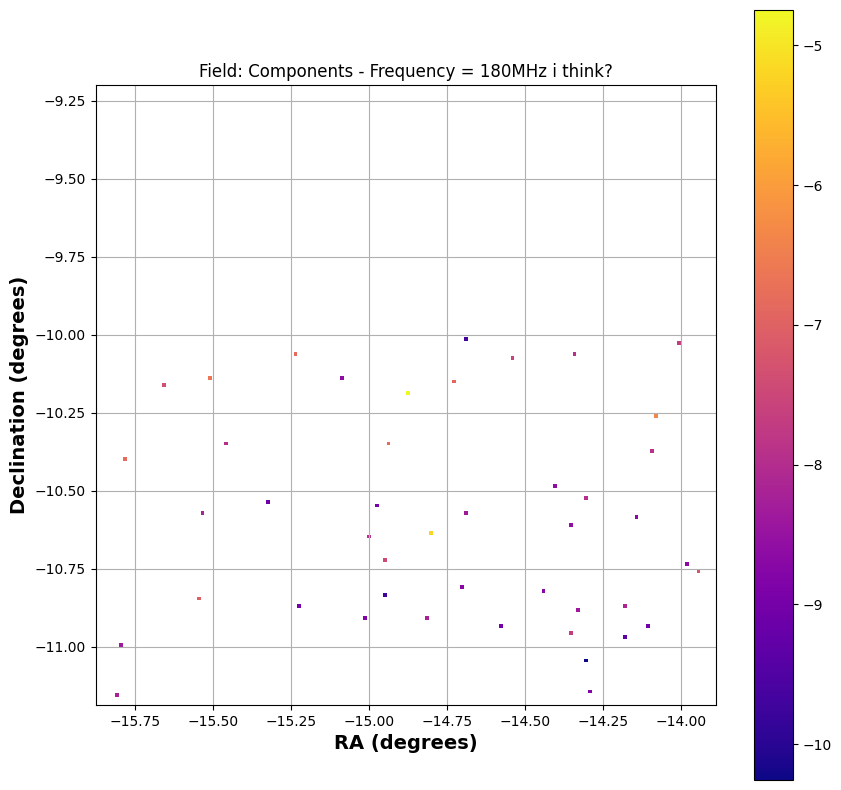

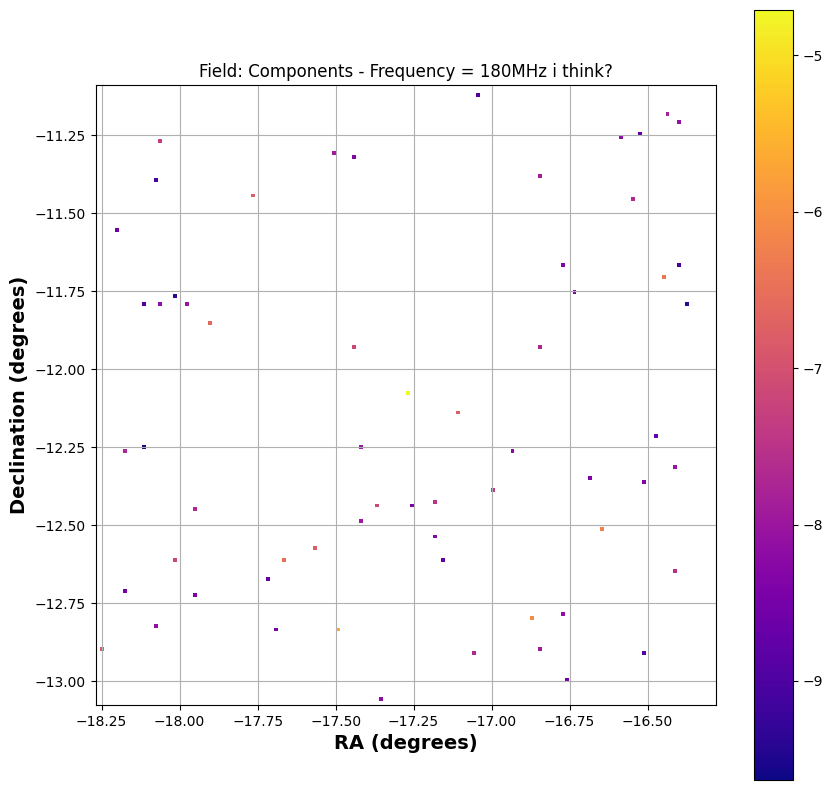

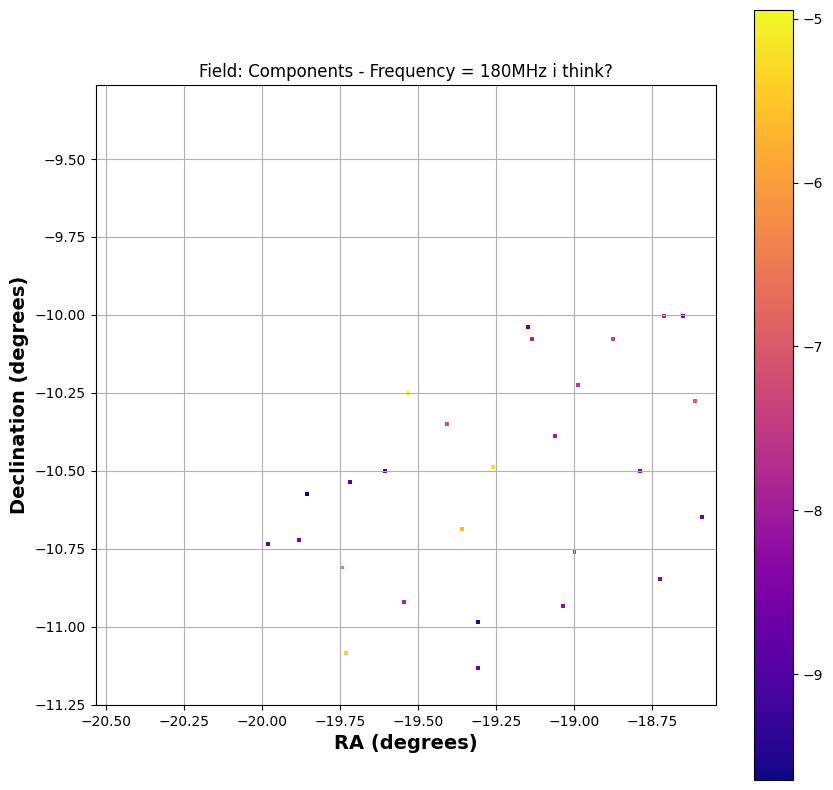

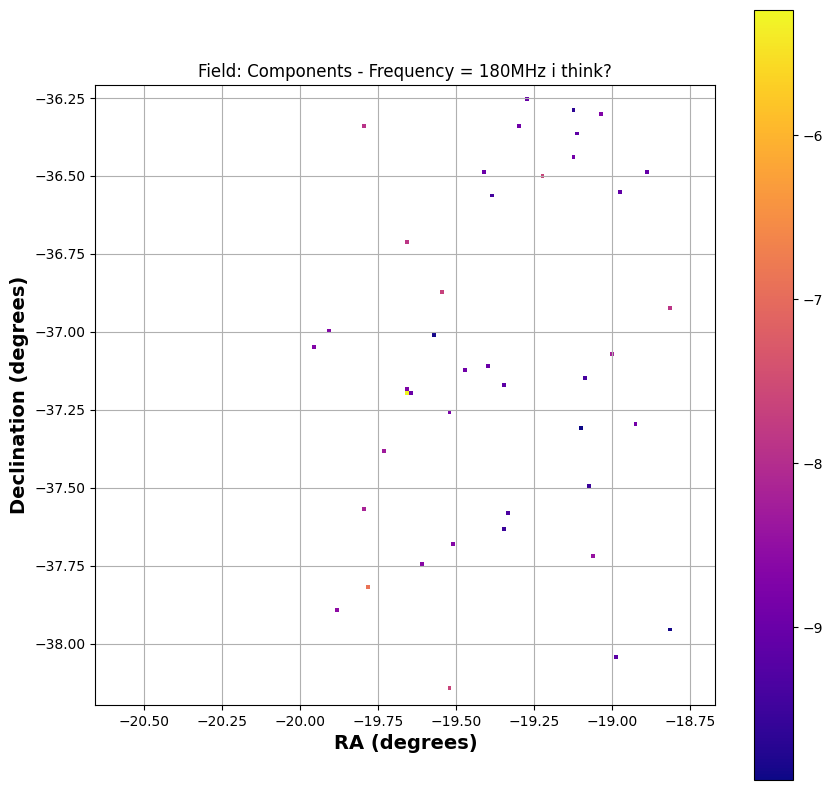

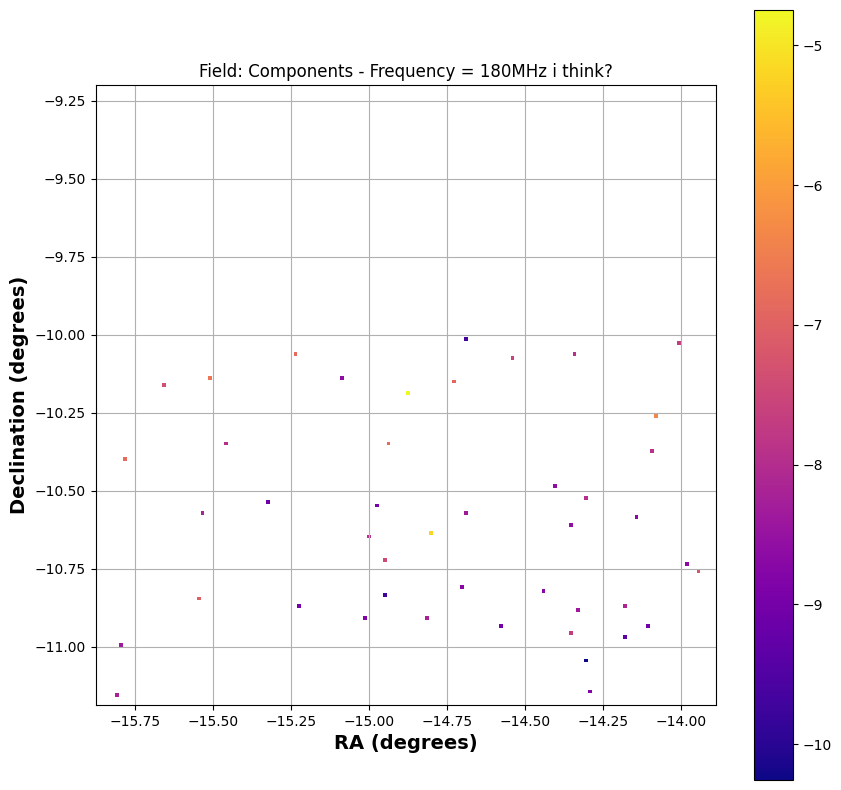

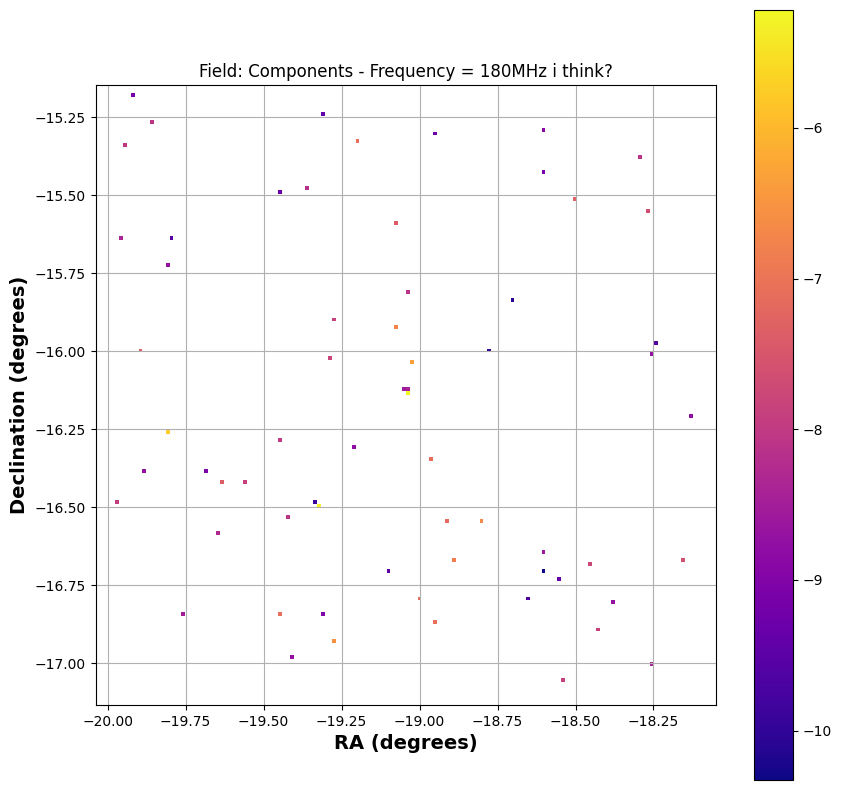

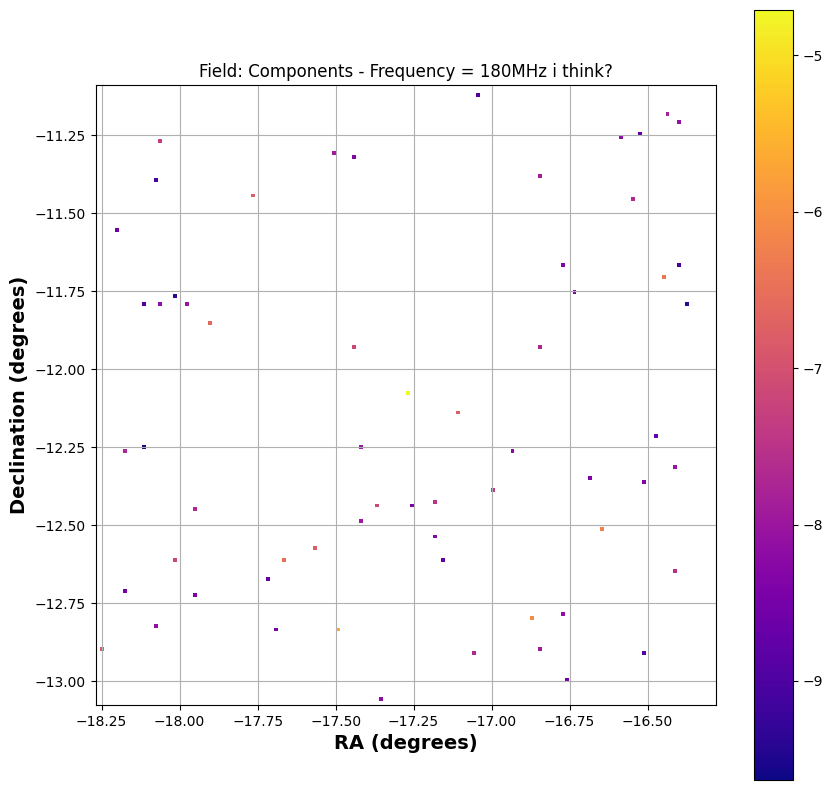

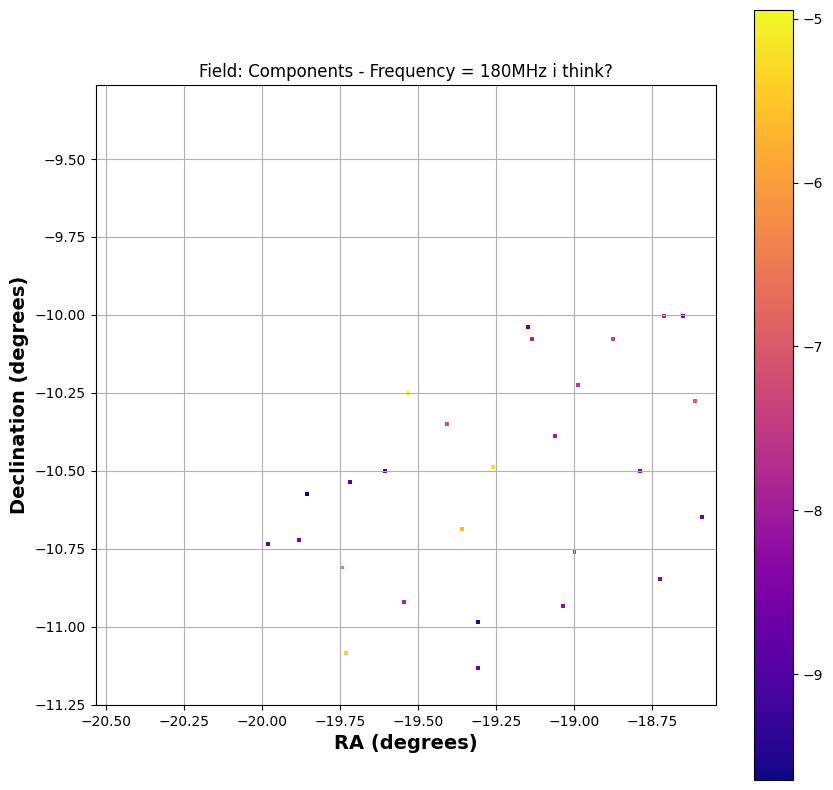

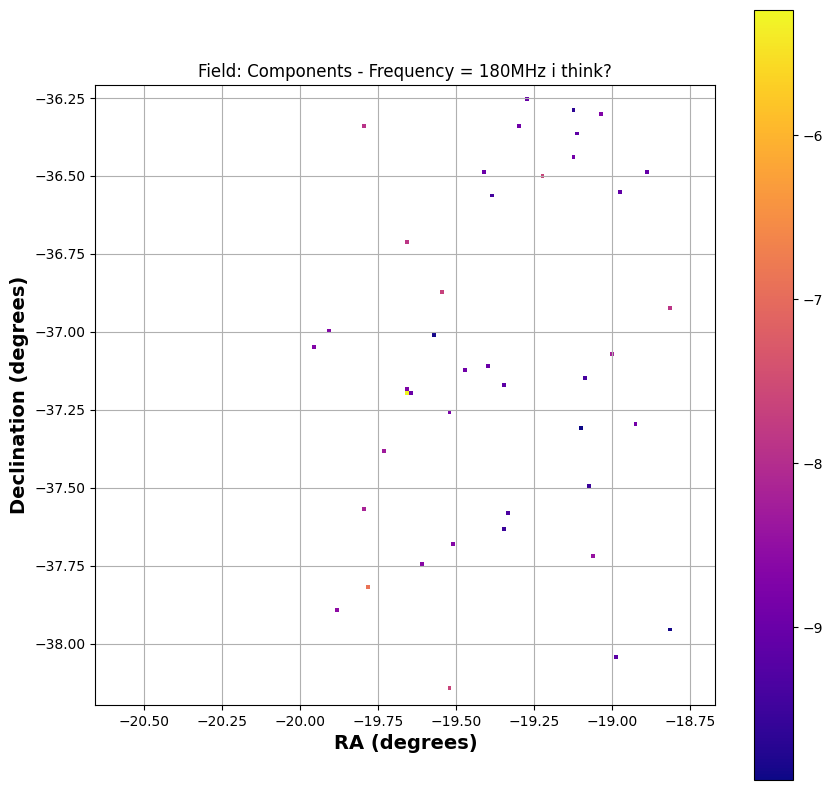

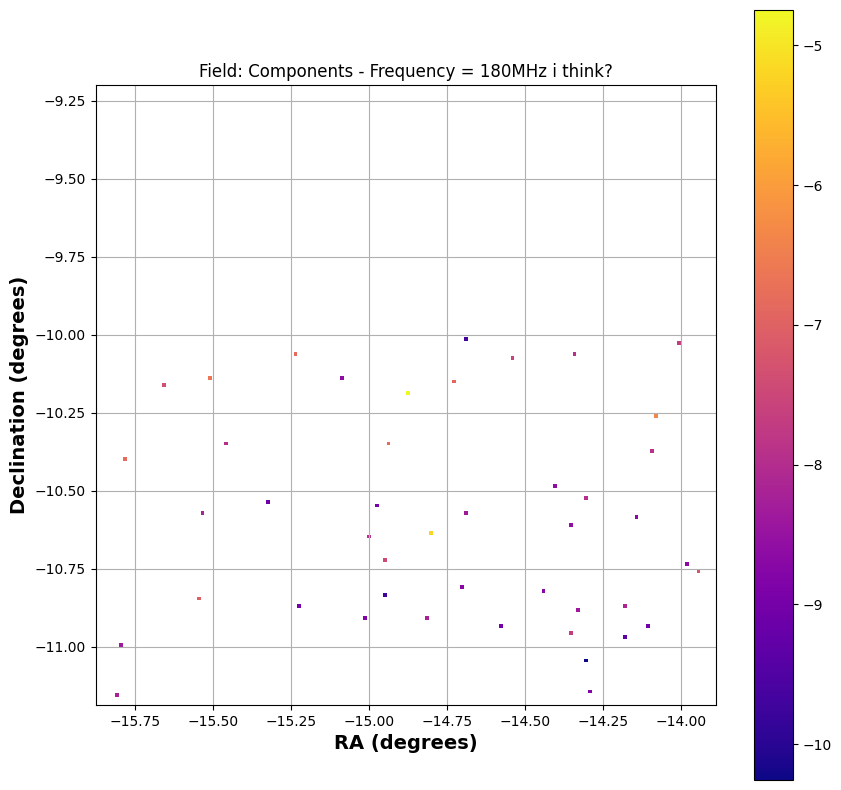

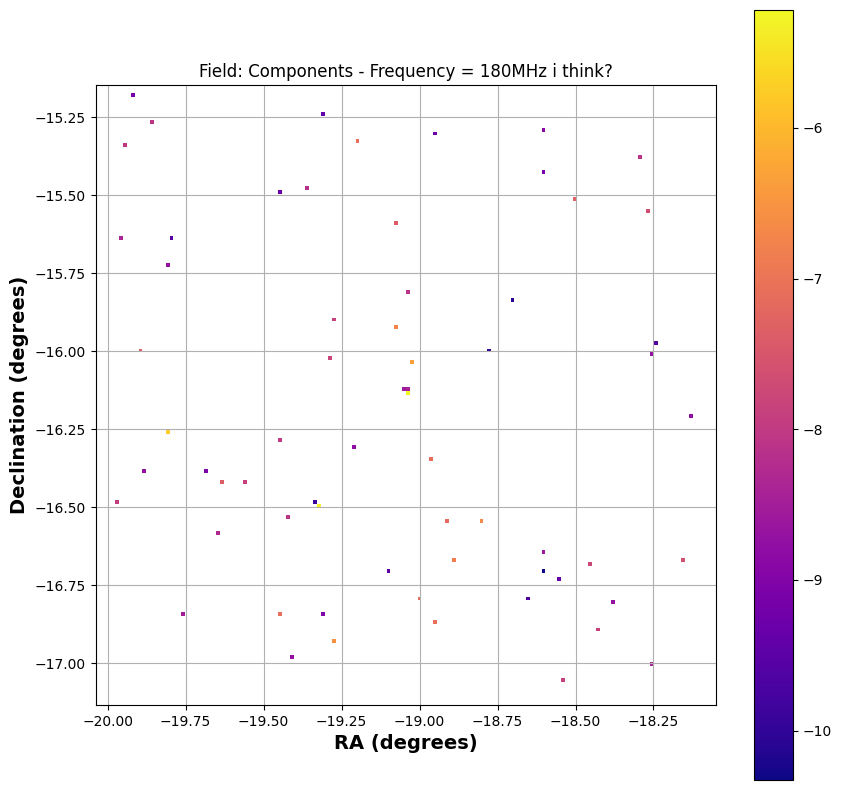

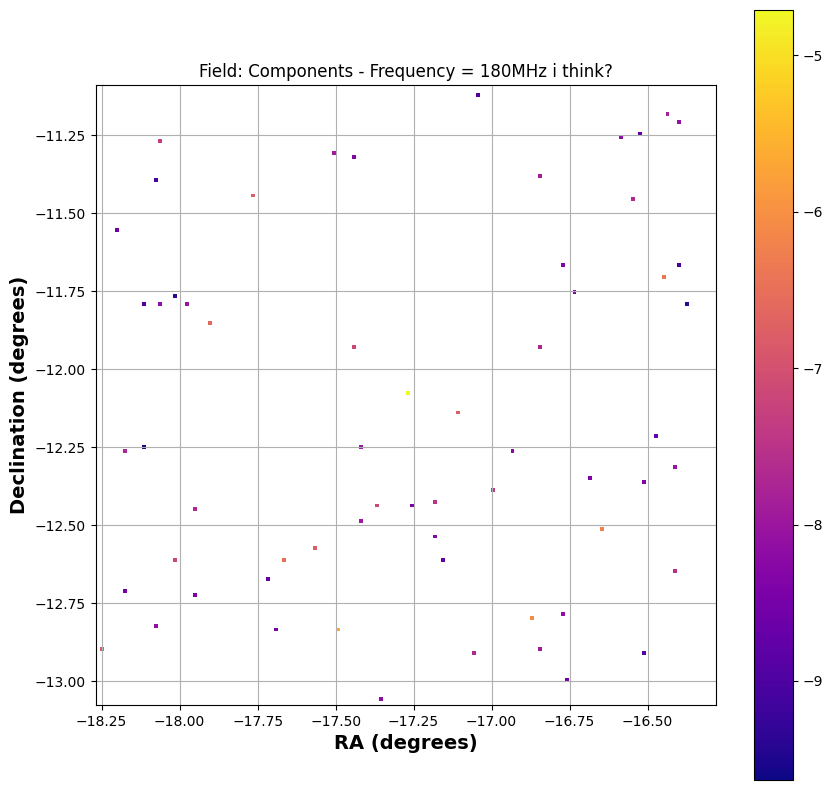

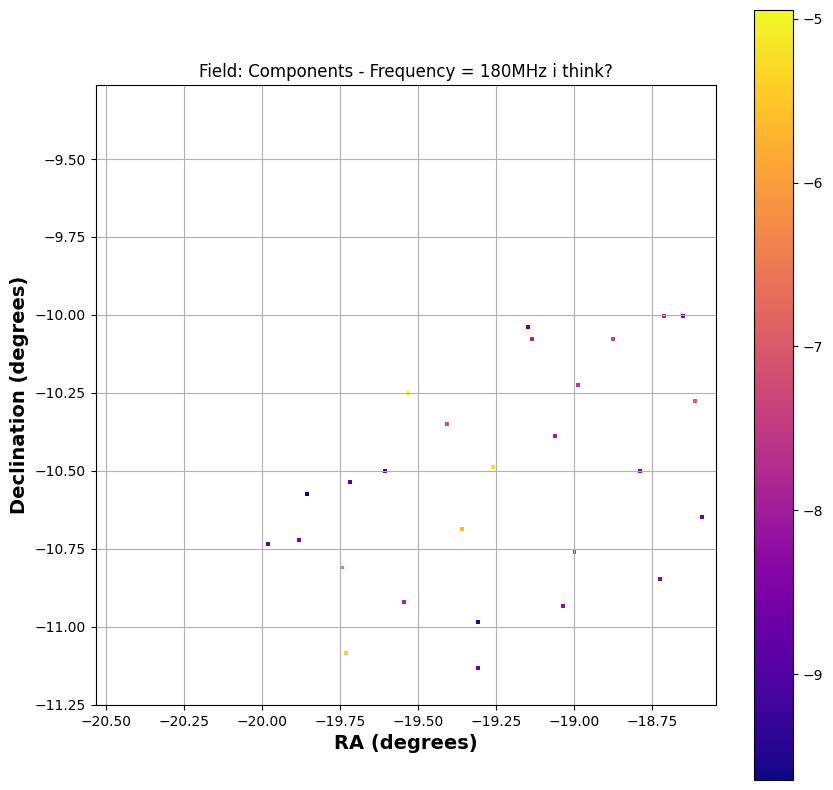

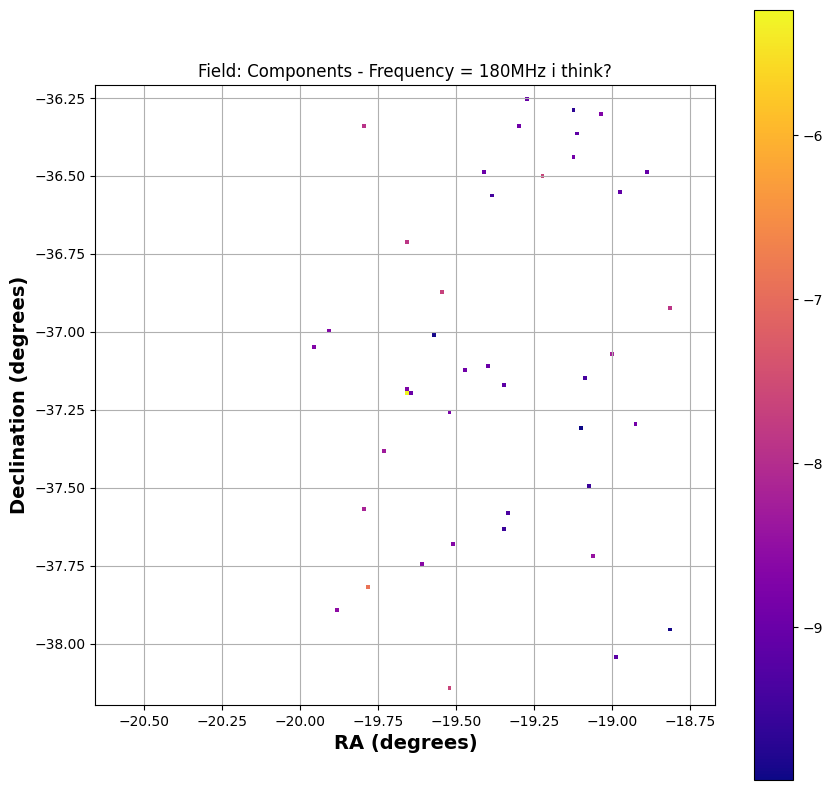

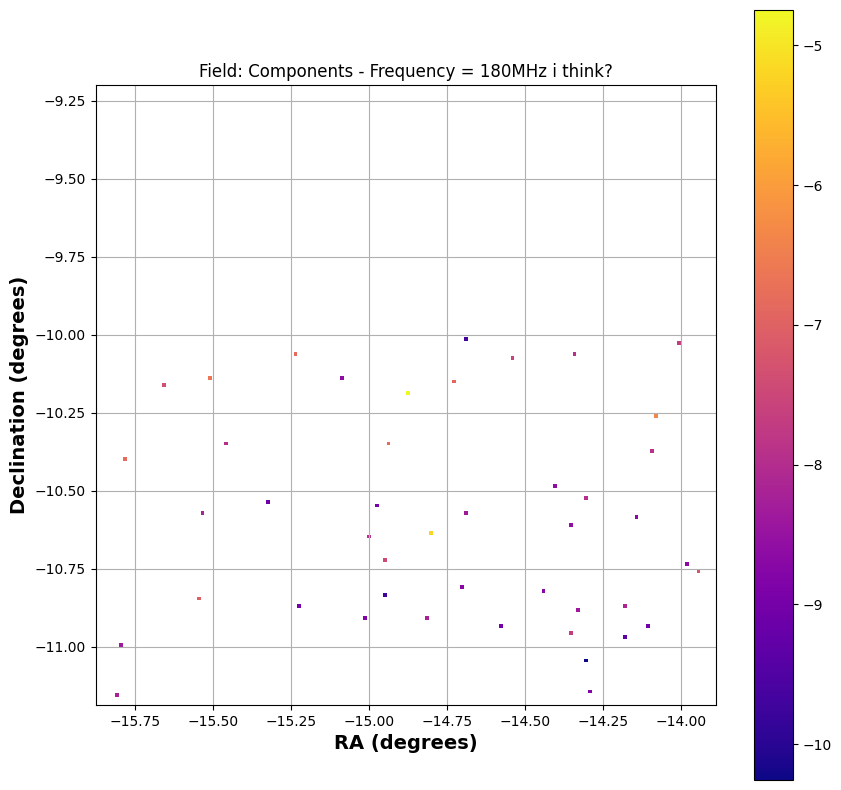

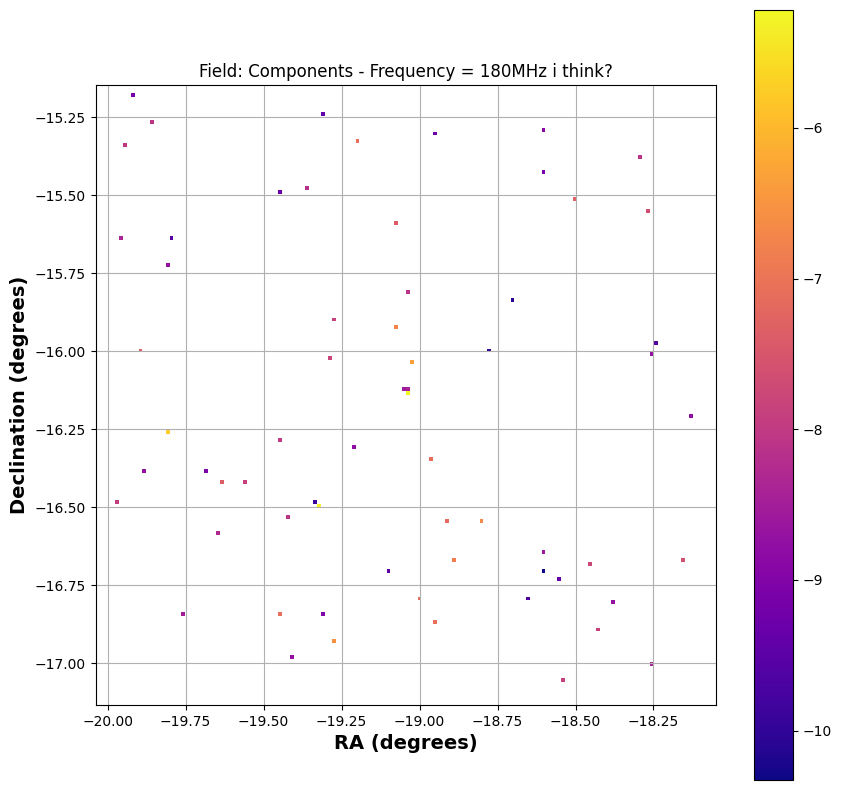

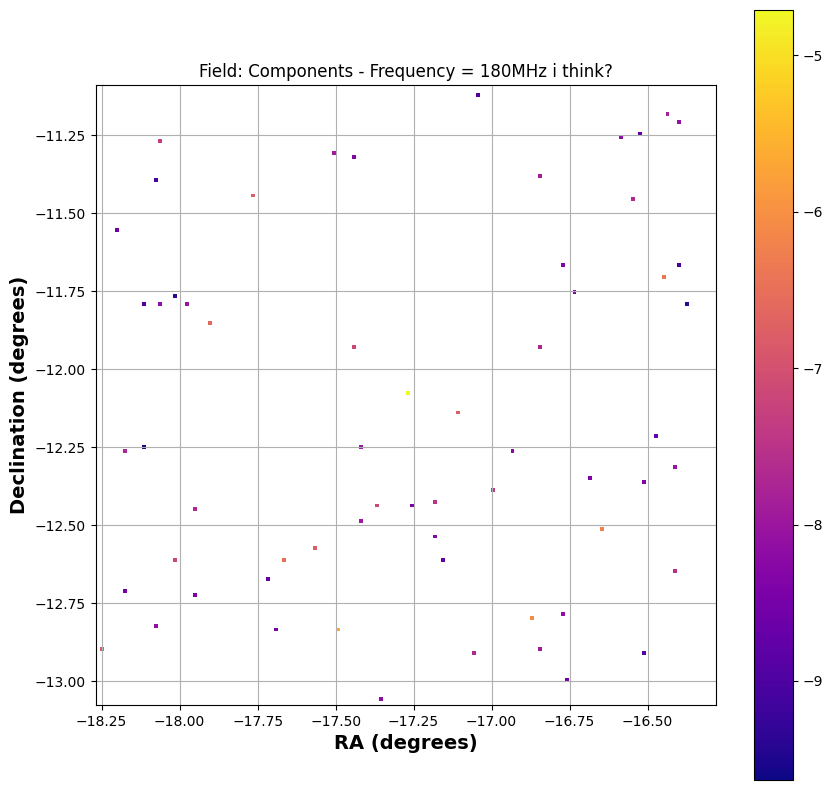

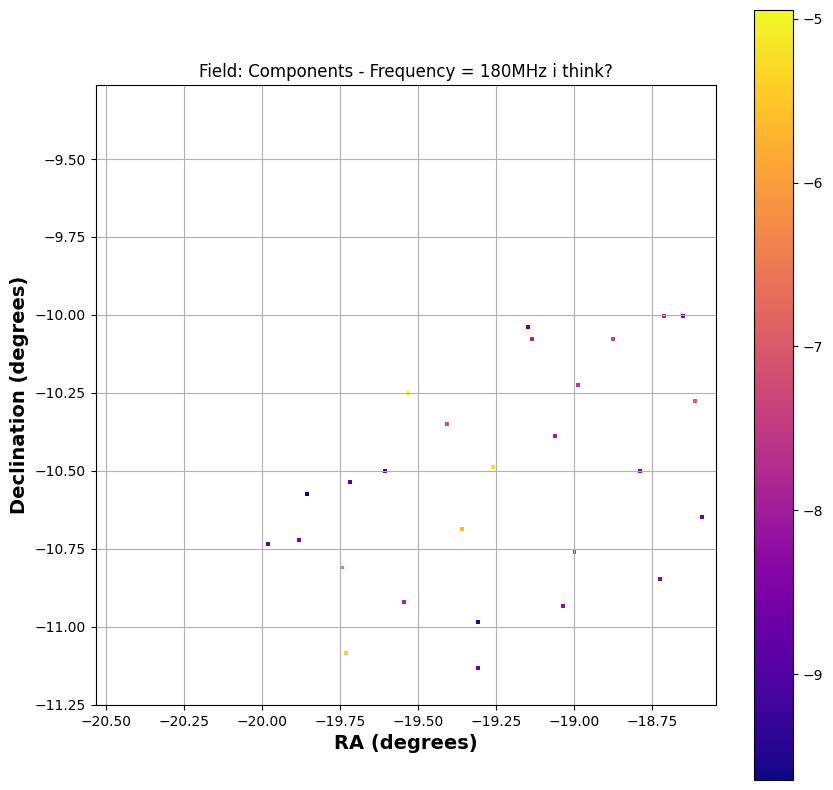

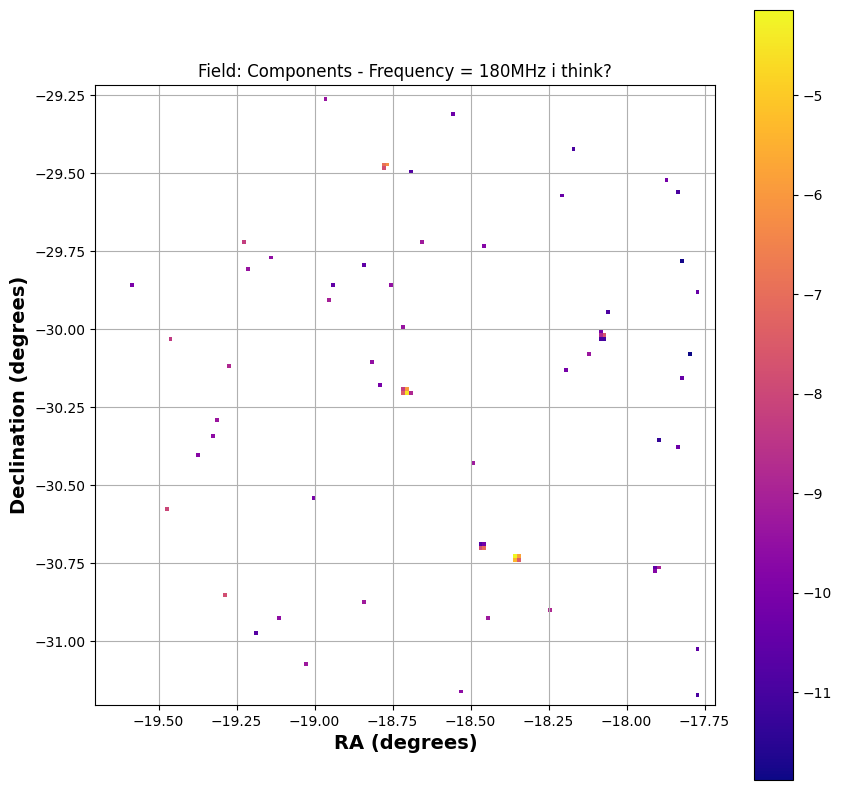

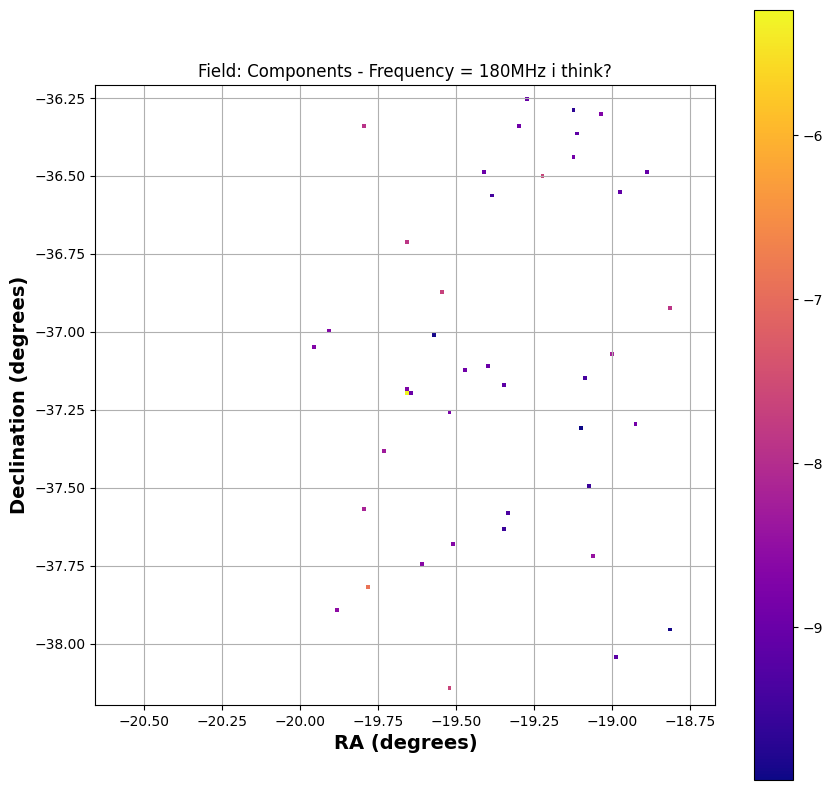

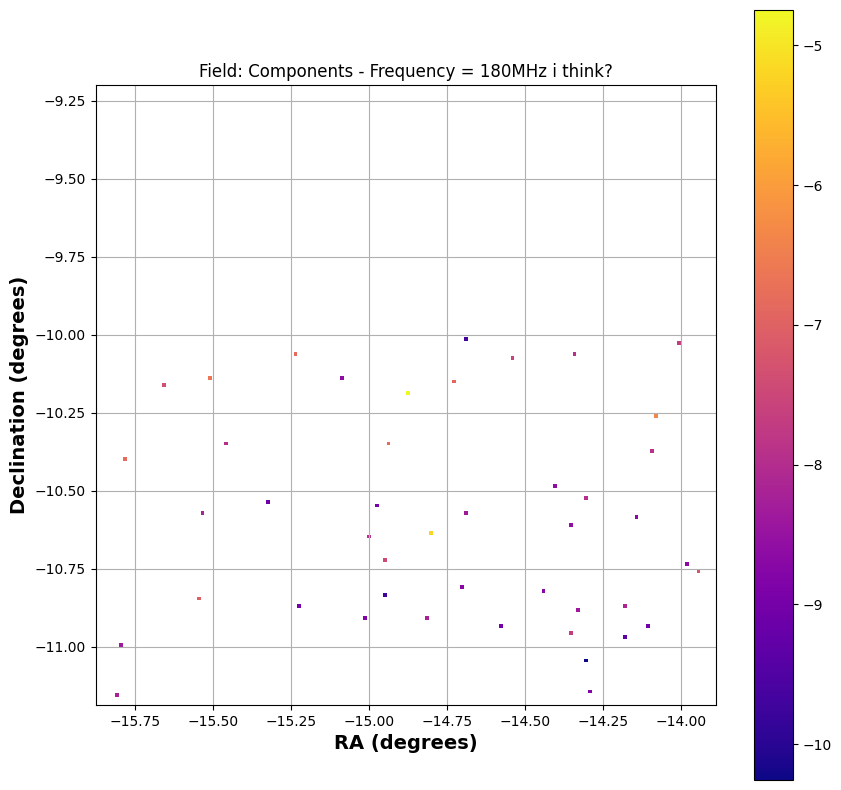

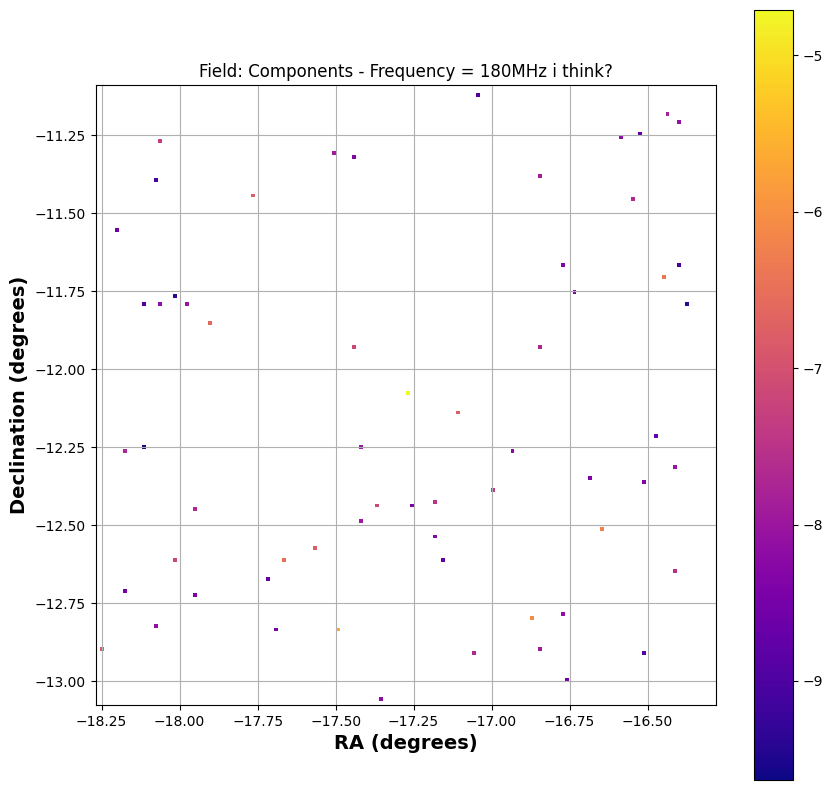

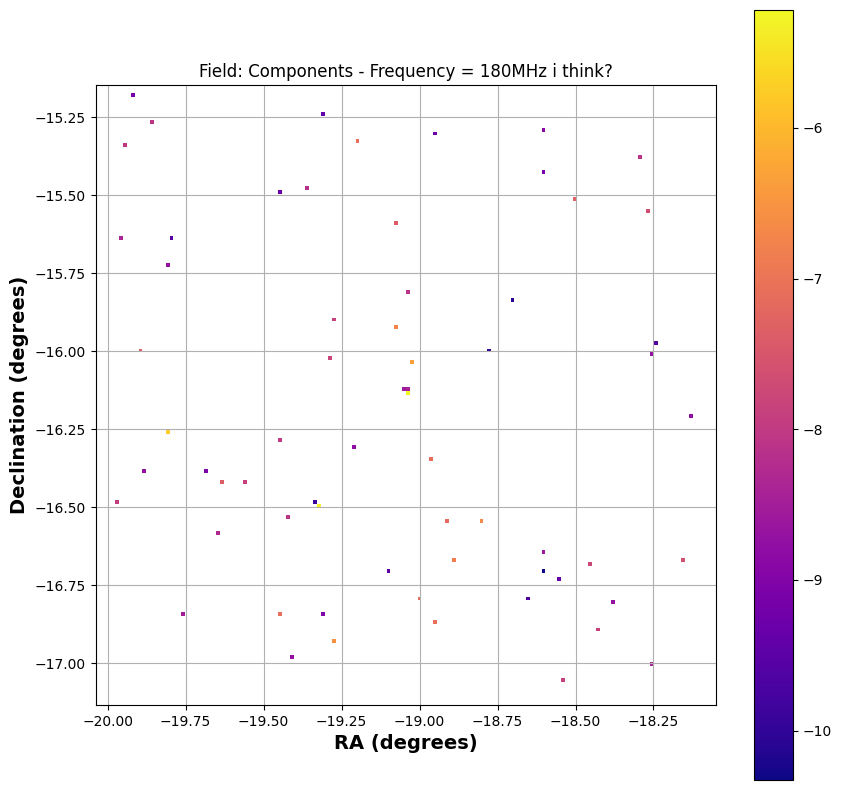

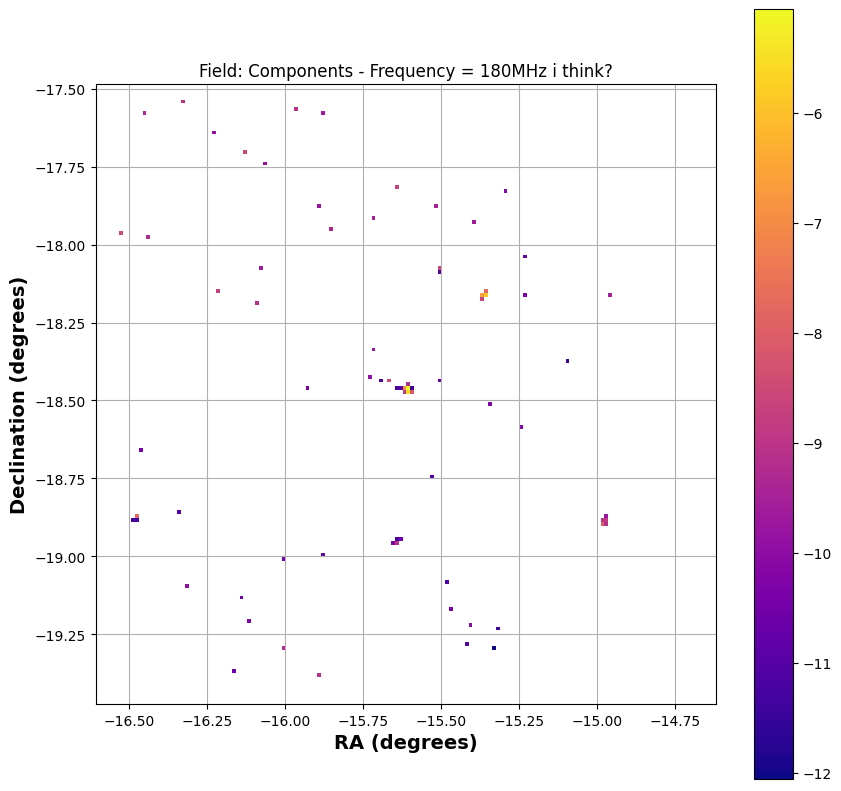

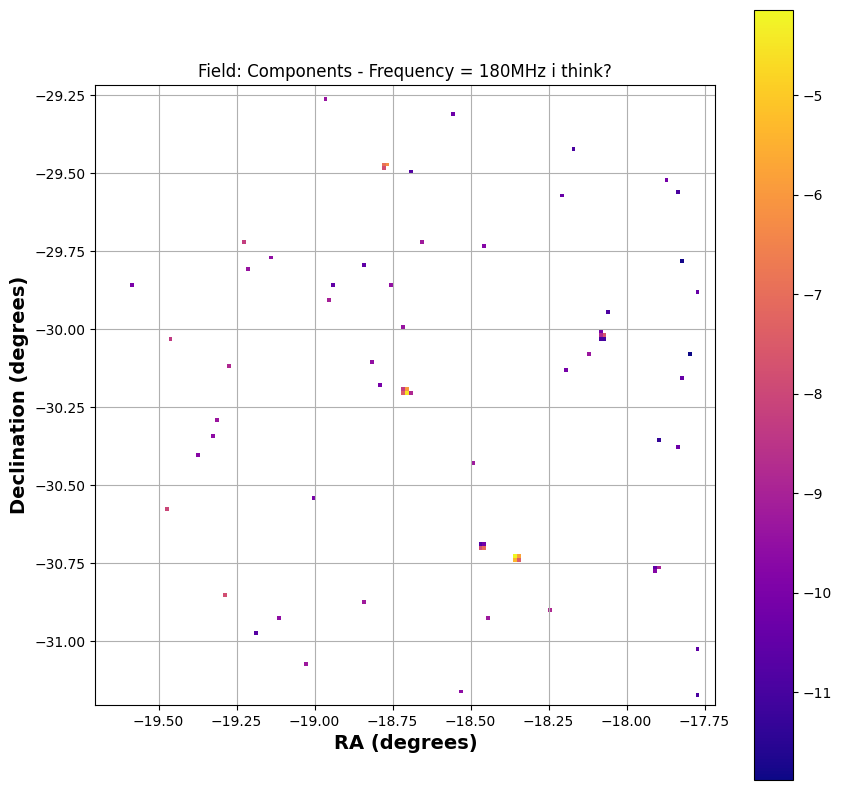

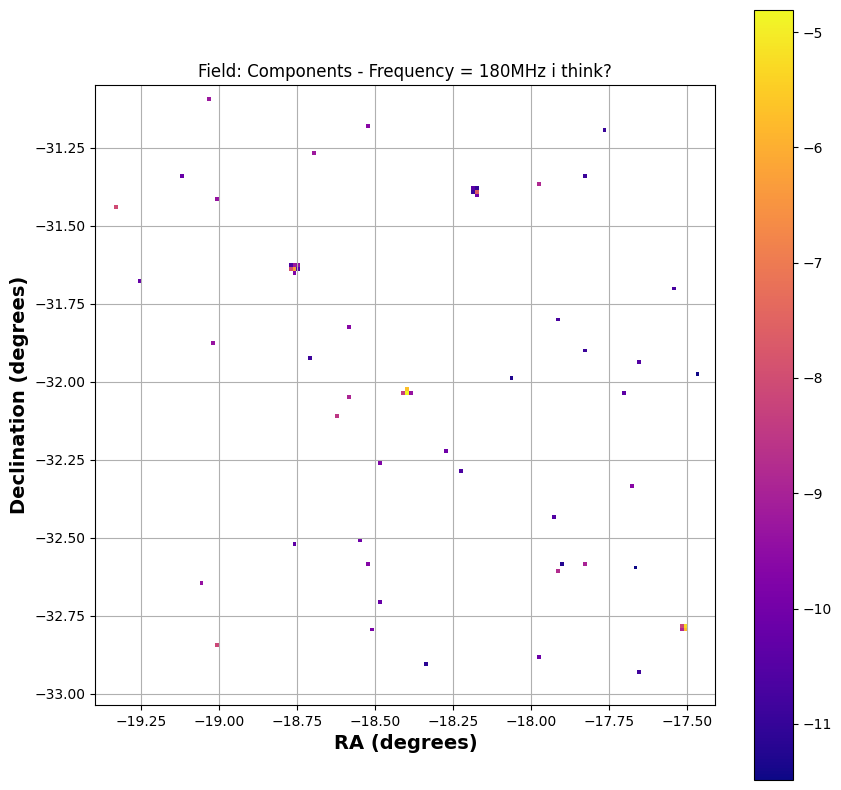

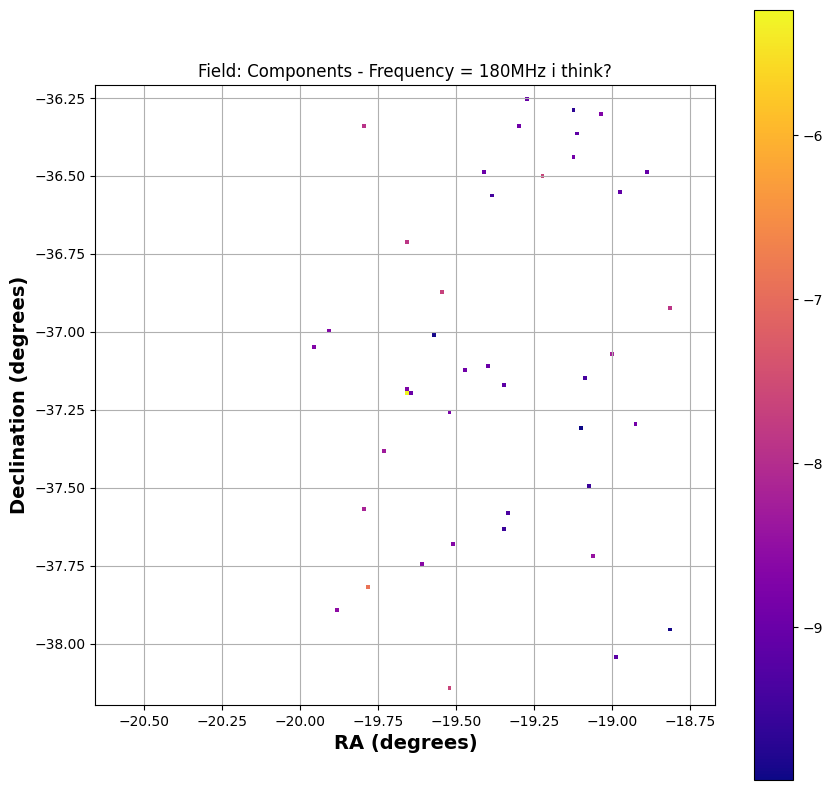

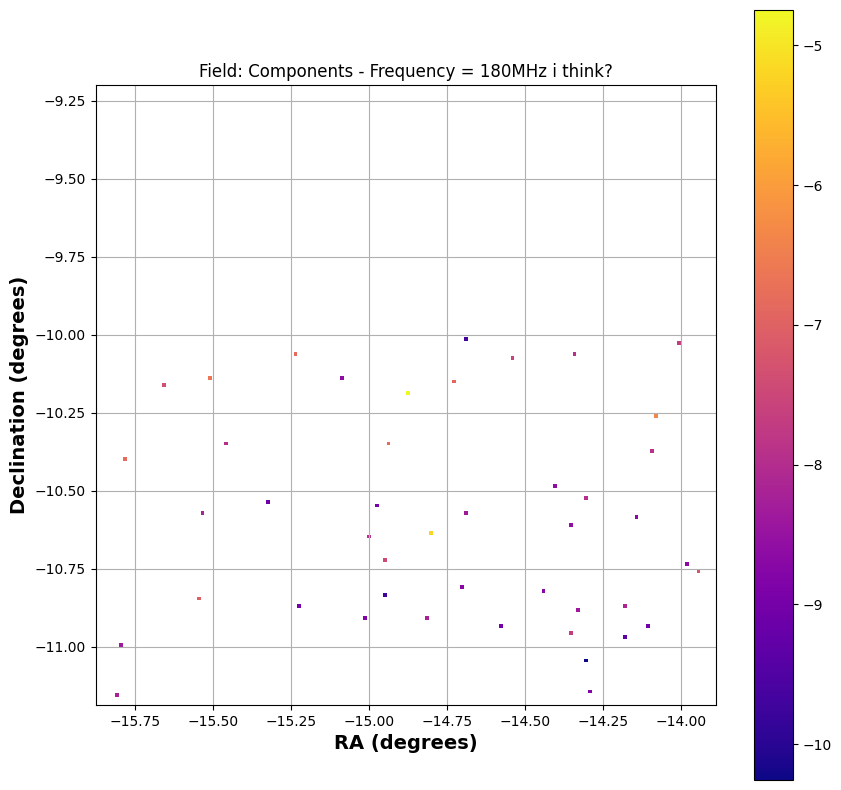

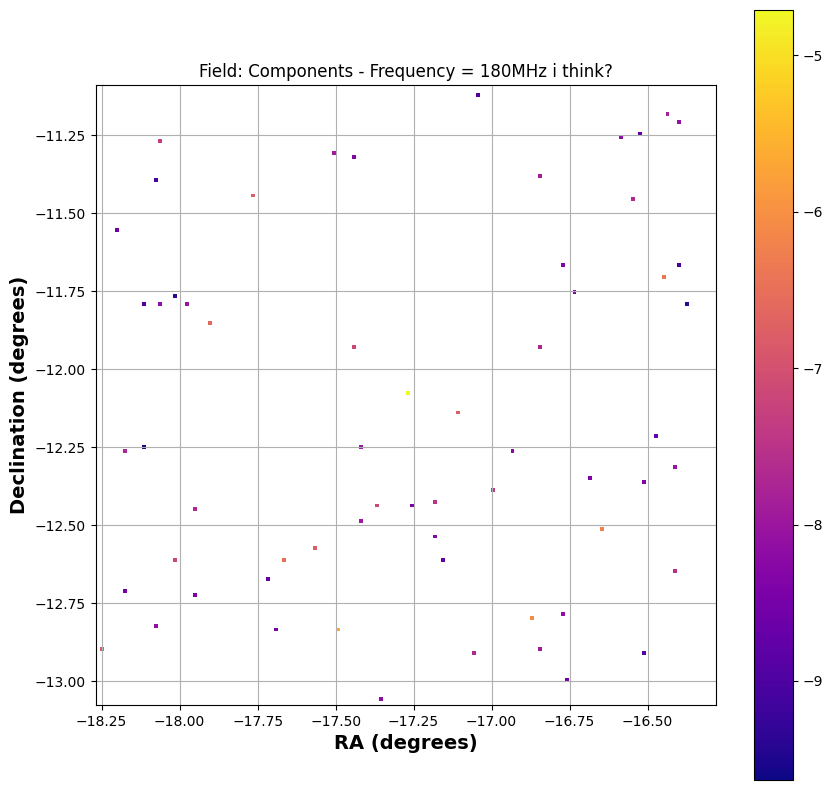

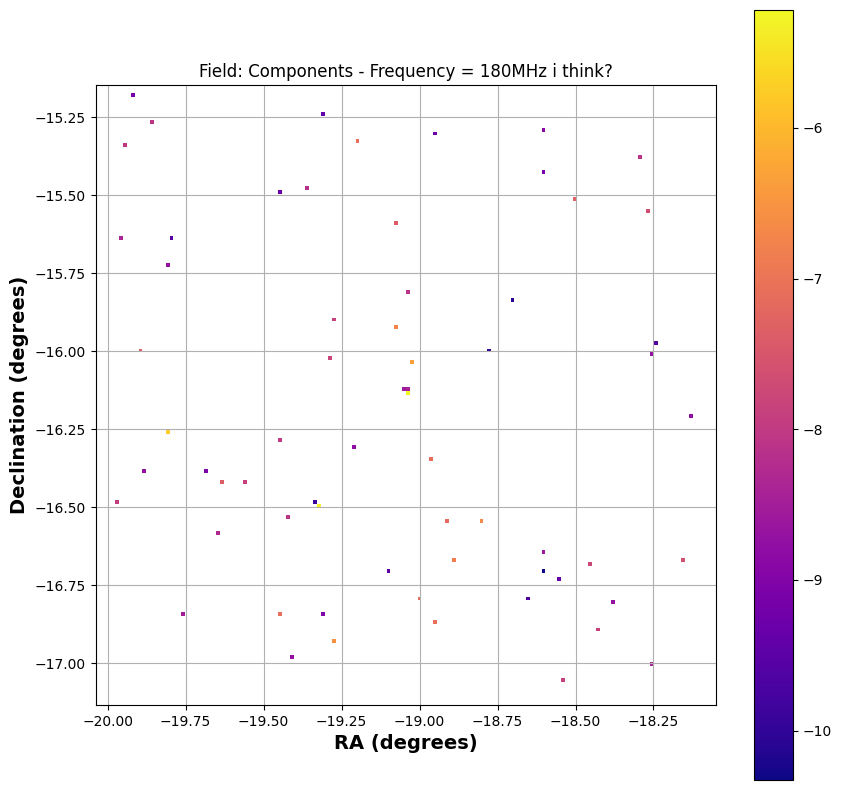

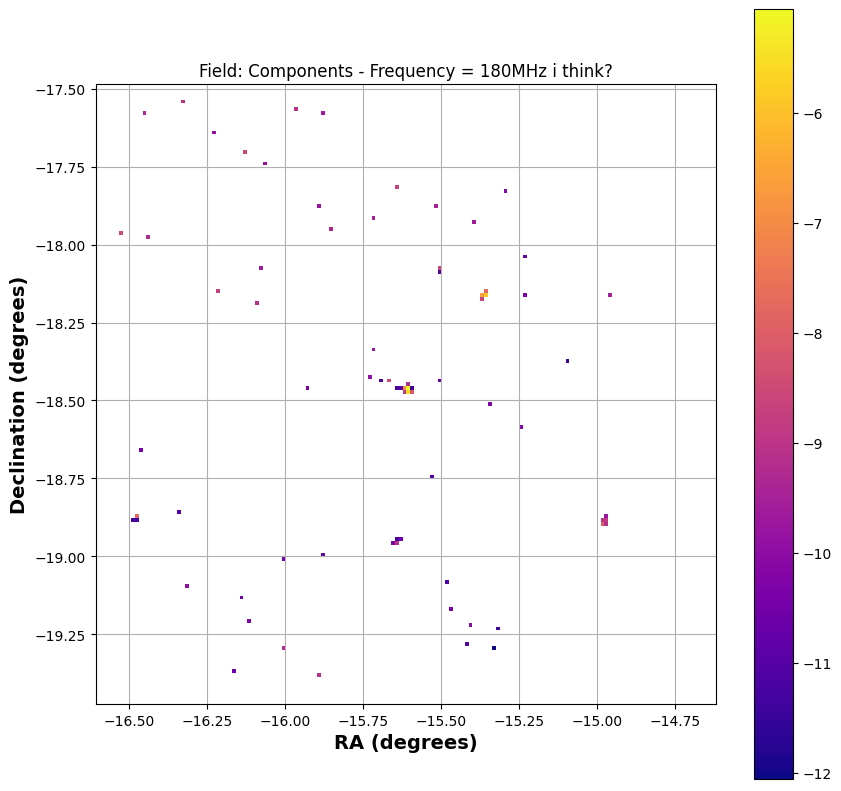

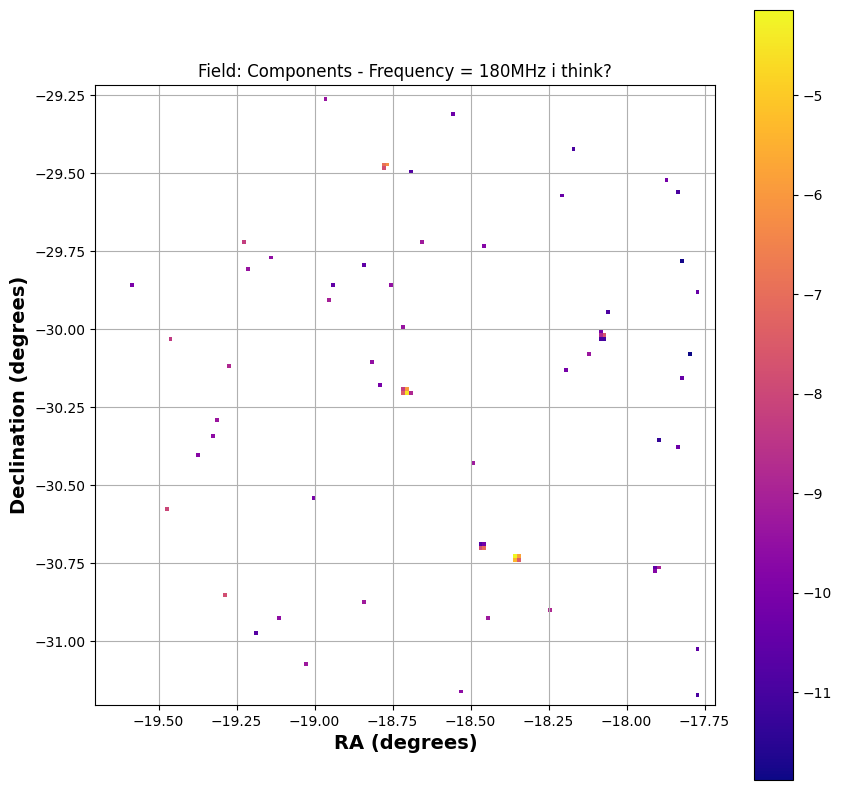

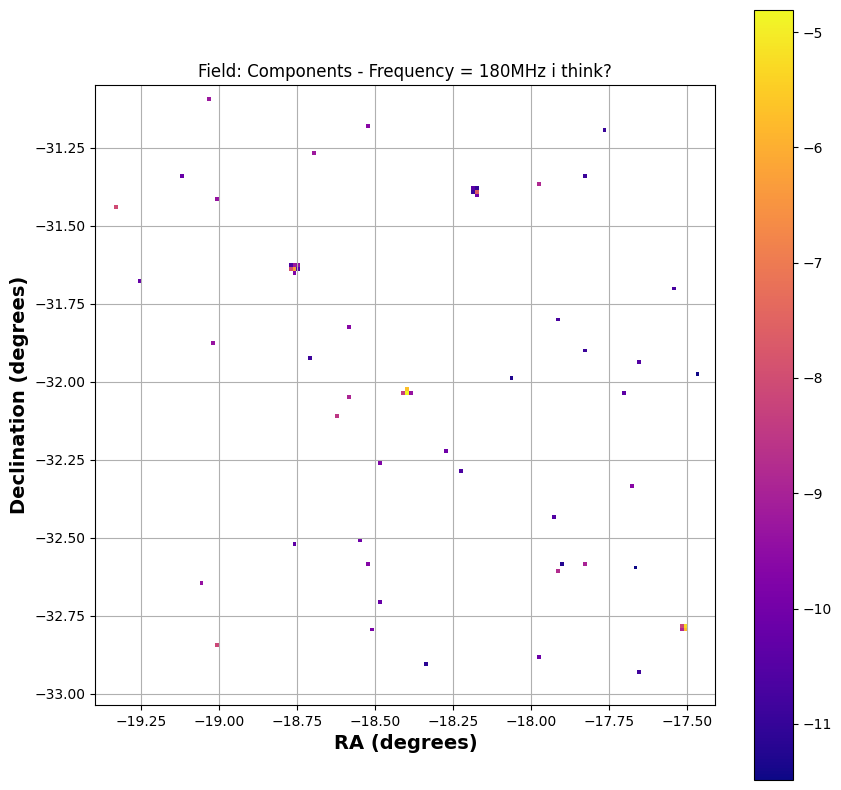

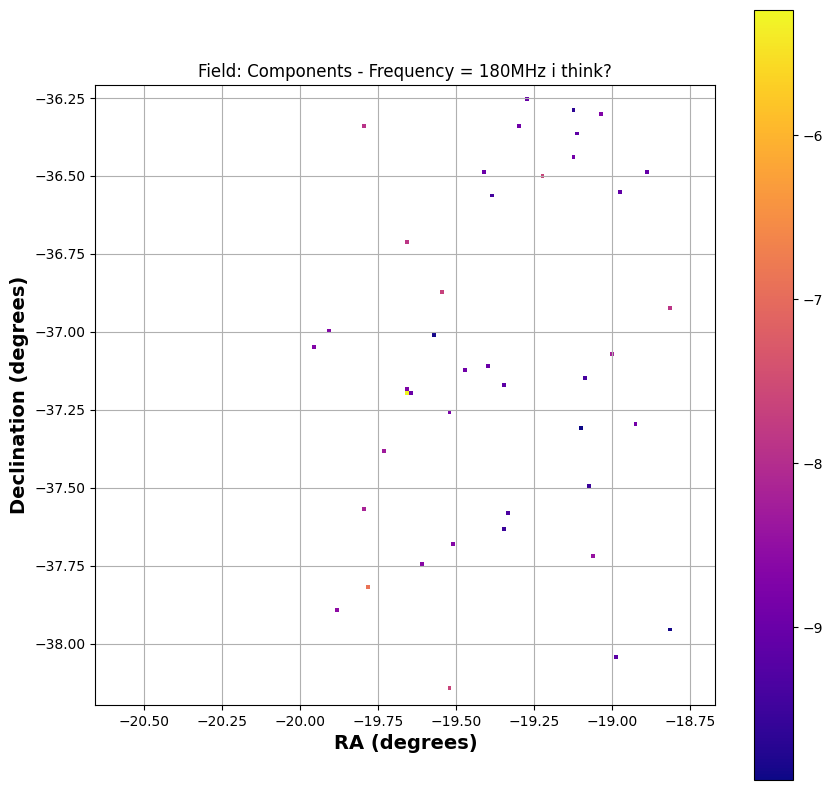

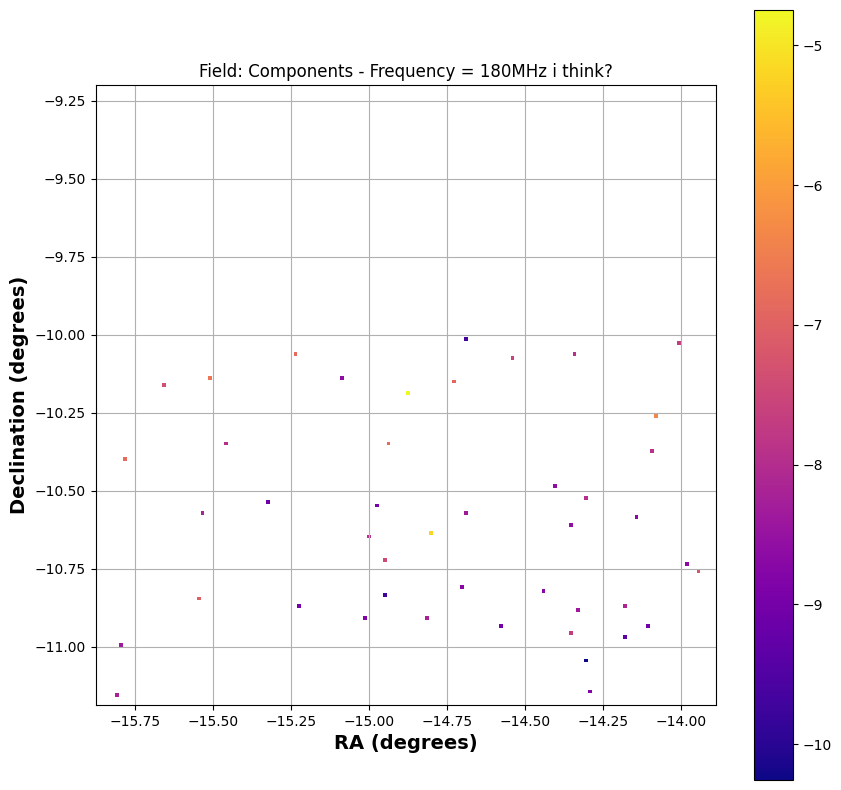

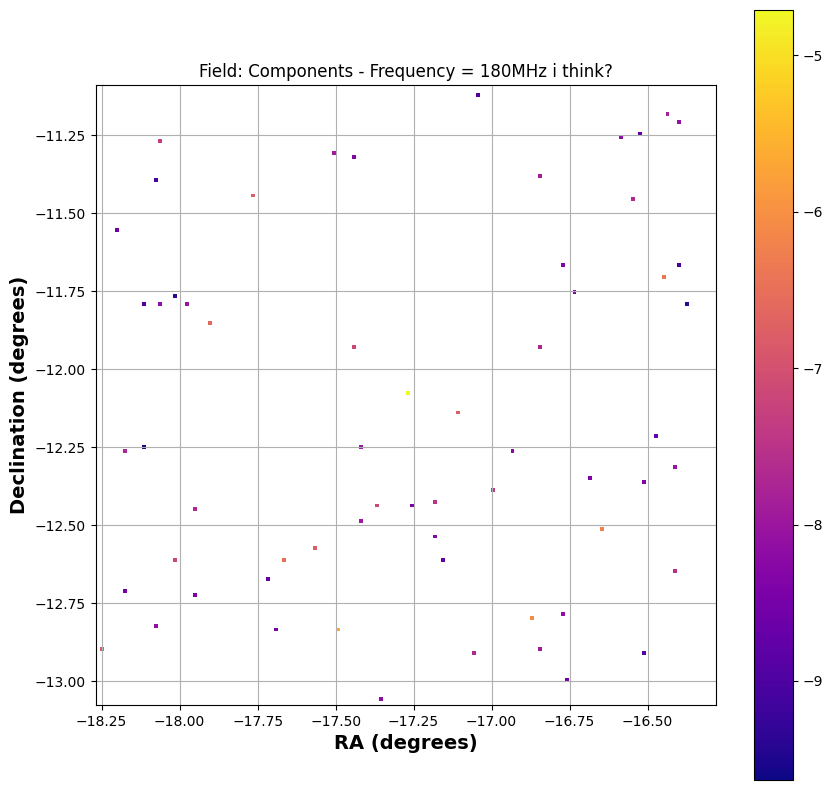

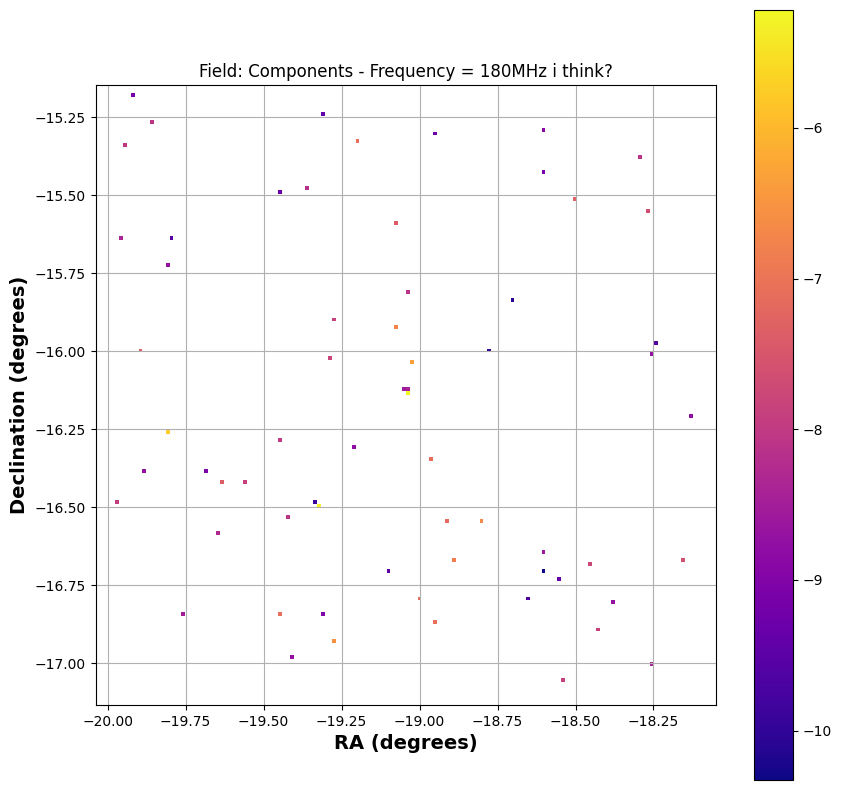

In [15]:
for i in brightest_flux_index:
    b_ra = new_ra_1[i]
    b_dec = new_dec_1[i]
    b_eyed = new_eyed_1[i]
    b_flux = new_flux_1[i]

    ra_zoom = [b_ra - 1 , b_ra + 1] 
    dec_zoom = [b_dec - 1, b_dec + 1]
    #remove unecessary elements in array so it doesnt plot everything!
    range_of_ra_dec = np.where((new_ra_1 >= ra_zoom[0]) & (new_ra_1 <= ra_zoom[1]) & (new_dec_1 >= dec_zoom[0]) & (new_dec_1 <= dec_zoom[1]))[0]
    #print(range_of_ra_dec)
    new_ra = new_ra_1[range_of_ra_dec]
    new_dec = new_dec_1[range_of_ra_dec]
    new_flux = new_flux_1[range_of_ra_dec]
    new_eyed = new_eyed_1[range_of_ra_dec]
    
    (pixels, ra_pixel_centers, dec_pixel_centers) = pixelate(ra_zoom, dec_zoom, n_bins, new_ra, new_dec, new_eyed, new_flux)



    pixels2 = pixels / n_obs
    #dec as y, ra as x

    #figsize scales the plot, in this case i chose 10,10 square so its relatively big and easy to see!
    plt.figure(figsize=(10,10))

    #imshow is a type of plot that shows the image (duh)
    #took the log of the flux scale which made things happen
    #interpolation made the pixels not fuzzy
    #origin reoriented the y axis so it goes from 0 to 100 instead of 100 to 0
    #cmap changed the colorbar so that the colors are sequentially dark-light in relation to flux
    plt.imshow(np.transpose(np.log(pixels2)), interpolation = "nearest", origin = "lower", cmap = "plasma", 
           extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], 
           dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]])

    #the x and y axis labels are not accurate right now but that's okay :)
    plt.xlabel('RA (degrees)', fontweight='bold', size=14)
    plt.ylabel('Declination (degrees)', fontweight='bold', size=14)
    plt.title('Field: Components - Frequency = 180MHz i think?')

    plt.colorbar()
    plt.grid()
    plt.show()

